#### Introduction

In [1]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
import math
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
import matplotlib.ticker as ticker

c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Matias\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
zip_path = '../00_Data_Bases/Supermercado_onehot.zip' 
csv_filename = 'Supermercado_onehot.csv'

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        df = pd.read_csv(f)

In [3]:
display(HTML(df.to_html(max_rows=5, max_cols=200, notebook=True)))

In [4]:
df = df.drop('department_id', axis=1)

In [5]:
column_names = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 
                'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 
                'max_order', 'order_number_group_21-40 order', 'order_number_group_41-60 order',
                'order_number_group_61-80 order', 'order_number_group_81-100 order', 
                'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 
                'day_Wednesday', 'order_time_list_Dawn', 'order_time_list_Morning', 
                'order_time_list_Night', 'department_babies', 'department_bakery', 
                'department_beverages', 'department_breakfast', 'department_bulk', 
                'department_canned goods', 'department_dairy eggs', 'department_deli', 
                'department_dry goods pasta', 'department_frozen', 'department_household', 
                'department_international', 'department_meat seafood', 'department_missing', 
                'department_other', 'department_pantry', 'department_personal care', 
                'department_pets', 'department_produce', 'department_snacks', 
                'product_name_asian foods', 'product_name_baby accessories', 
                'product_name_baby bath body care', 'product_name_baby food formula', 
                'product_name_bakery desserts', 'product_name_baking ingredients', 
                'product_name_baking supplies decor', 'product_name_beauty']

department_columns = [col for col in column_names if col.startswith('department')]

print(department_columns)

['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 'department_canned goods', 'department_dairy eggs', 'department_deli', 'department_dry goods pasta', 'department_frozen', 'department_household', 'department_international', 'department_meat seafood', 'department_missing', 'department_other', 'department_pantry', 'department_personal care', 'department_pets', 'department_produce', 'department_snacks']


### Clustering - K-Means

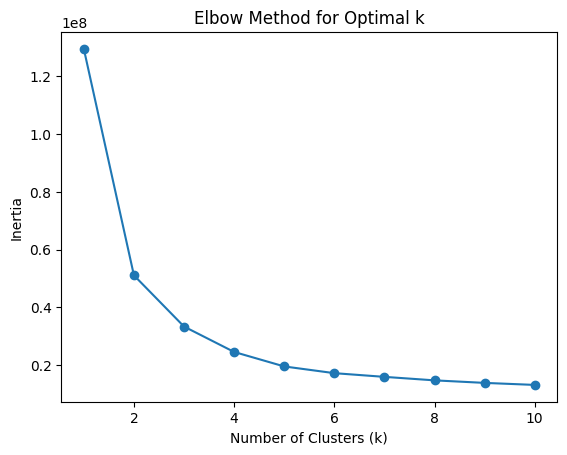

In [6]:
X = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

inertia_values = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

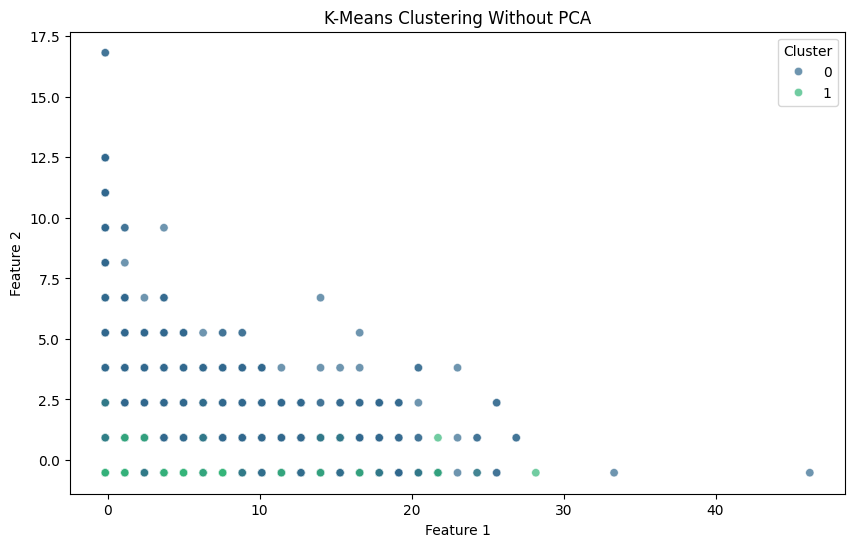

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2

kmeans1 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans1.fit_predict(X_scaled)

df_c1 = pd.DataFrame(X_scaled, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df_c1['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', data=df_c1, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

In [8]:
df_l1 = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

In [9]:
df_l1['Clusters_1'] = kmeans1.labels_

C:\Users\Matias\AppData\Local\Temp\ipykernel_44140\956863942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l1['Clusters_1'] = kmeans1.labels_


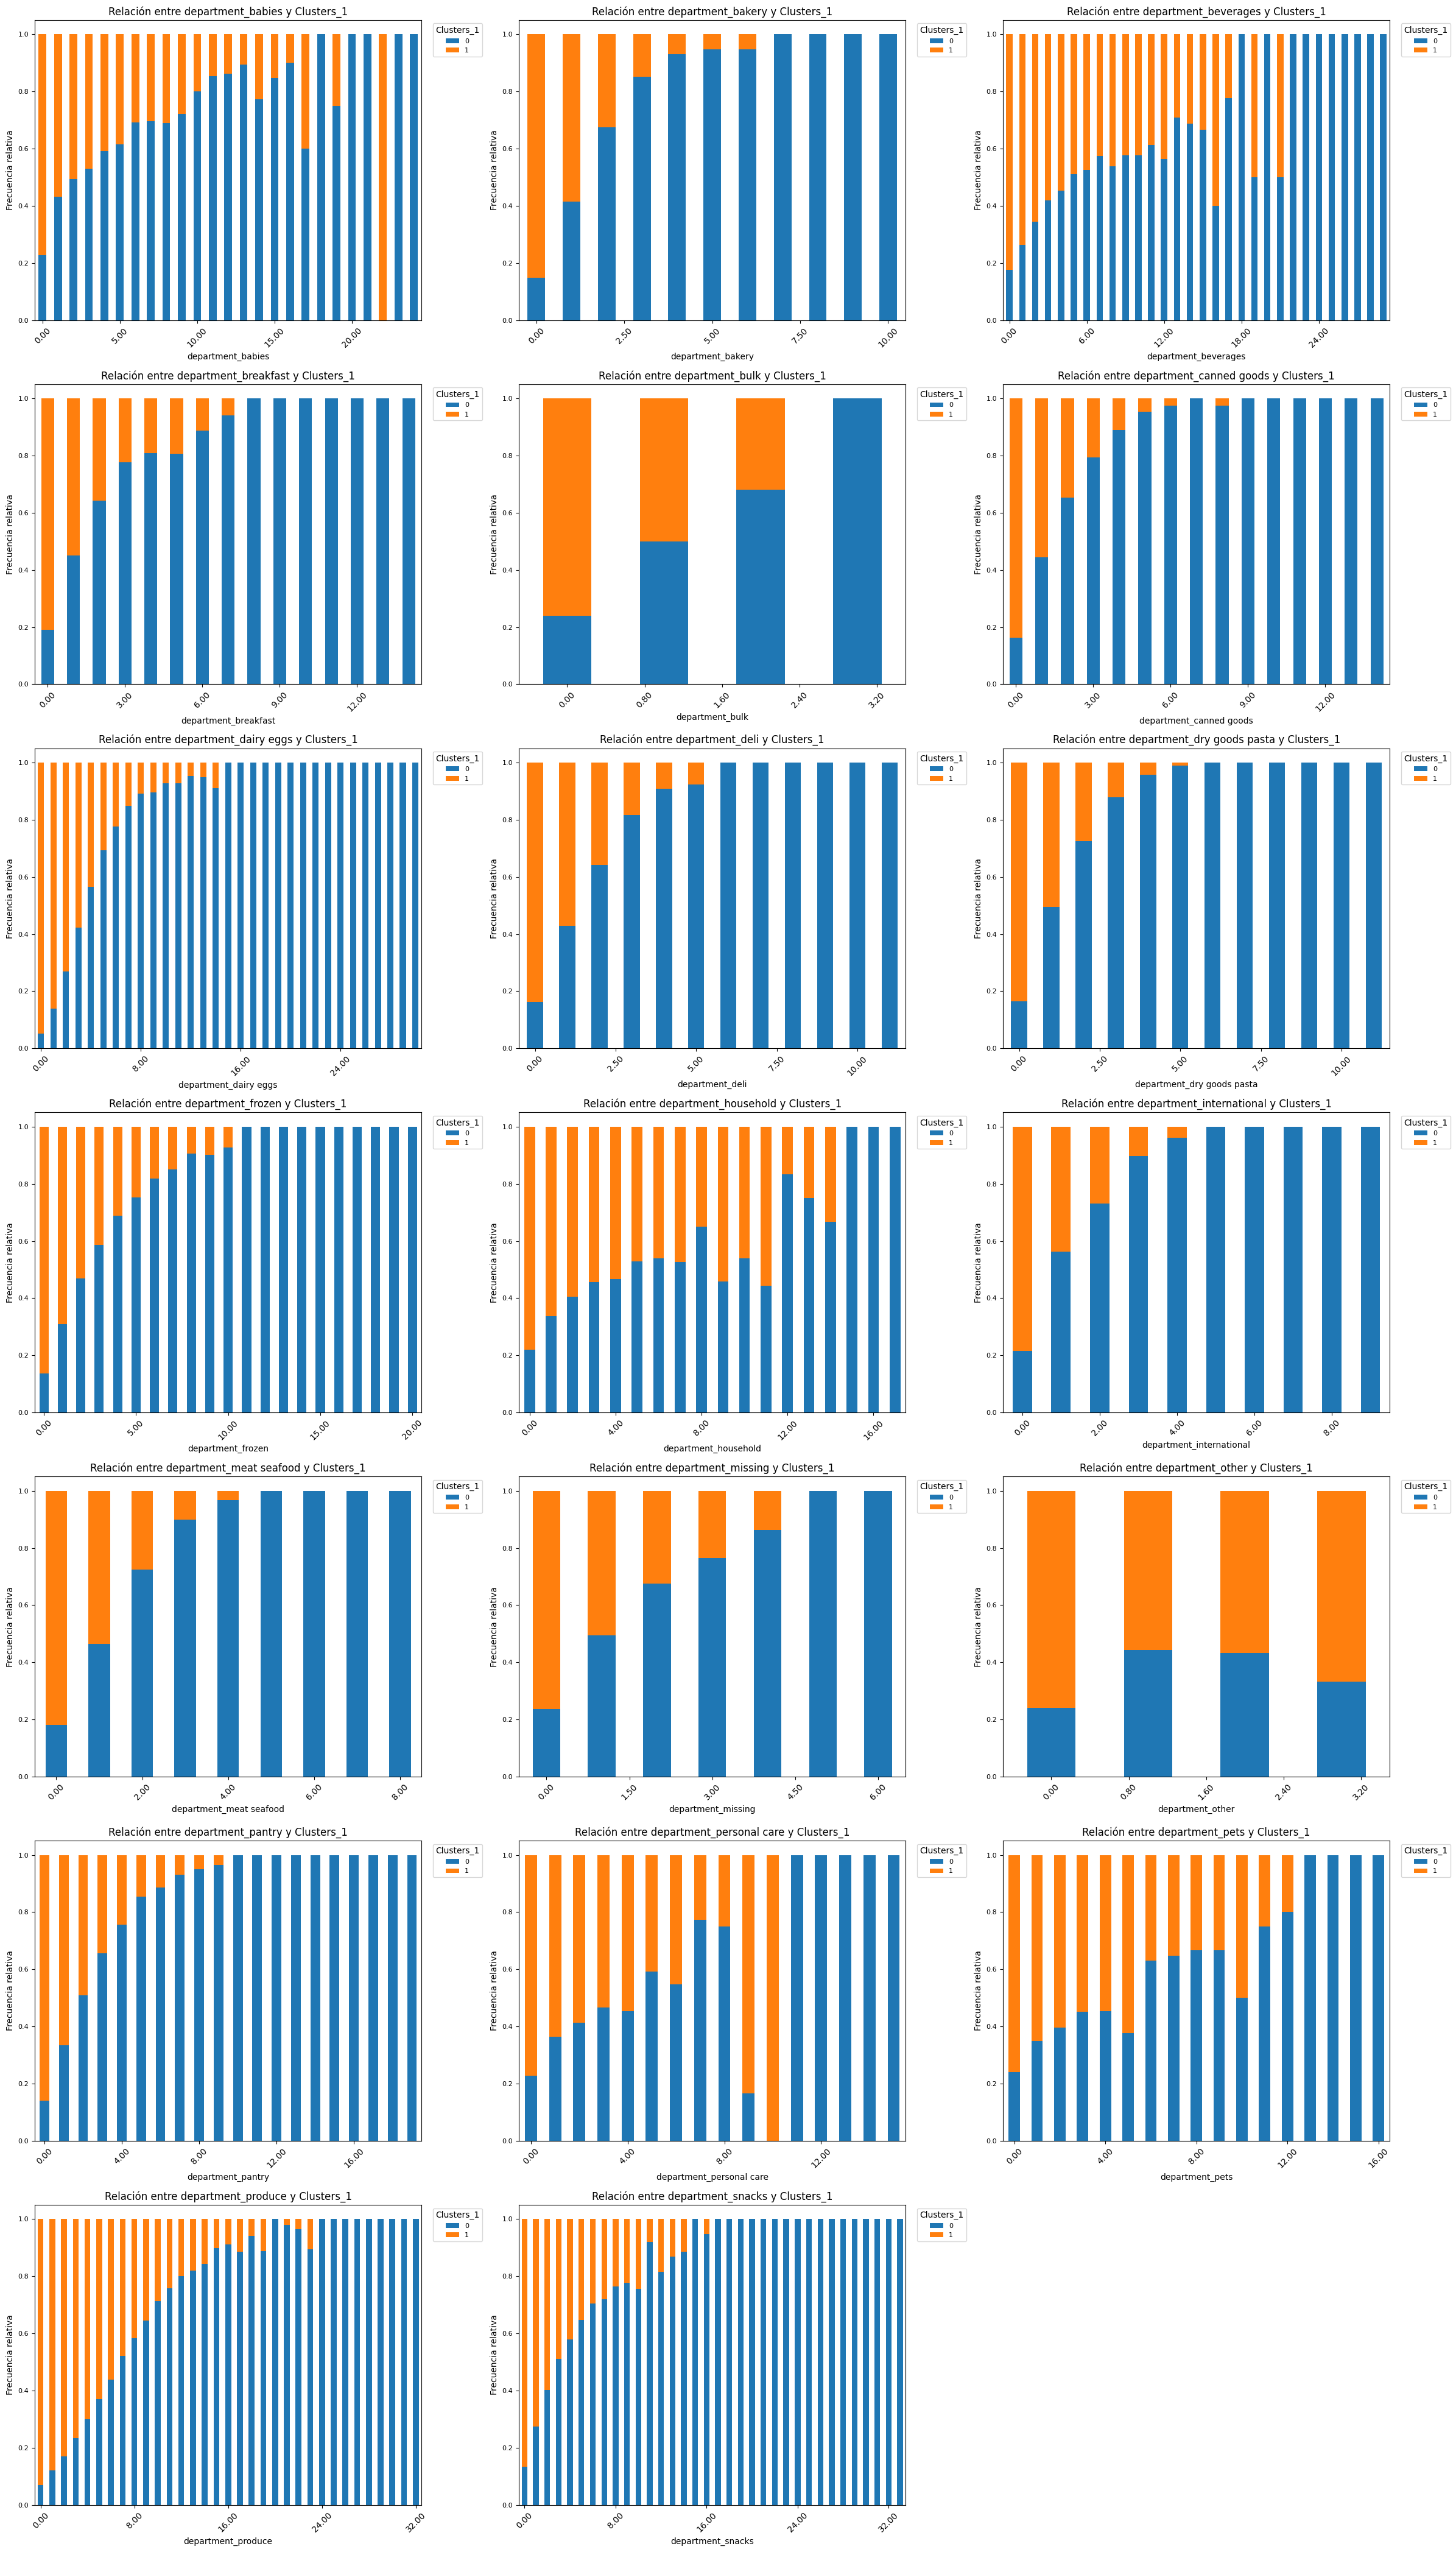

In [10]:
department_columns = [col for col in df_l1.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df_l1.groupby(columna)['Clusters_1'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_1', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_1', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()


In [11]:
stats = df_l1.groupby('Clusters_1').agg(['mean', 'median'])

mode_df = df_l1.groupby('Clusters_1').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_df.columns = pd.MultiIndex.from_product([mode_df.columns, ['mode']])

stats = pd.concat([stats, mode_df], axis=1)

stats_formatted = stats.style.format("{:.2f}").set_caption("Estadísticas Descriptivas por Clúster").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

#### **Análisis Comparativo de los Clusters**

El análisis de los datos permitió identificar dos grupos de clientes con comportamientos claramente diferenciados a partir de la clusterización realizada. El **Cluster 0** agrupa a clientes que realizan compras frecuentes y consistentes en departamentos esenciales como lácteos, frutas, verduras y productos congelados. Estos clientes presentan un comportamiento regular, con intervalos de compra promedio de 12.5 días, lo que los convierte en un segmento estratégico para la fidelización. Además, su preferencia por realizar compras durante la tarde (en torno a las 13:00 horas) y su diversificación en múltiples departamentos refuerzan su importancia como compradores recurrentes con alto valor para el negocio.

Por otro lado, el **Cluster 1** se caracteriza por agrupar clientes menos frecuentes y con patrones de compra más dispersos. Este grupo muestra una menor frecuencia en casi todos los departamentos y una limitada diversificación en sus compras. Los intervalos entre órdenes son ligeramente más cortos (10.5 días en promedio), pero con menos consistencia en sus patrones. Además, los clientes de este grupo tienden a realizar sus compras en la mañana (alrededor de las 10:00 horas) y adquieren un menor volumen de productos por orden. Aunque este segmento es menos valioso en términos inmediatos, representa una oportunidad significativa para mejorar su contribución al negocio mediante estrategias adecuadas.

#### **Acciones Estratégicas para los Clusters**

Dadas las características diferenciadas de cada cluster, es posible diseñar estrategias específicas para maximizar el valor de cada grupo. Para el **Cluster 0**, compuesto por clientes frecuentes y leales, las acciones deben enfocarse en programas de fidelización que recompensen la consistencia de sus compras. Esto puede incluir descuentos personalizados en productos esenciales y la introducción de paquetes combinados que incentiven la adquisición de un mayor volumen por orden. Además, notificaciones específicas en horarios habituales, como la tarde, pueden aumentar la efectividad de las promociones.

En contraste, el **Cluster 1** requiere un enfoque distinto. Este grupo de clientes ocasionales podría beneficiarse de campañas de marketing orientadas a aumentar la frecuencia de sus compras. Incentivos como descuentos para próximas órdenes o promociones cruzadas en departamentos menos explorados pueden ser efectivos para diversificar sus hábitos de compra. Asimismo, dirigir promociones a horarios matutinos, cuando estos clientes suelen realizar sus compras, puede ayudar a captar su atención y aumentar su participación.

En resumen, mientras que el **Cluster 0** representa un grupo altamente valioso que debe ser mantenido y fortalecido, el **Cluster 1** ofrece una oportunidad de crecimiento si se logran cambiar sus patrones de compra hacia una mayor frecuencia y diversificación. La implementación de estrategias personalizadas basadas en estas diferencias tiene el potencial de maximizar la rentabilidad y el impacto del negocio.


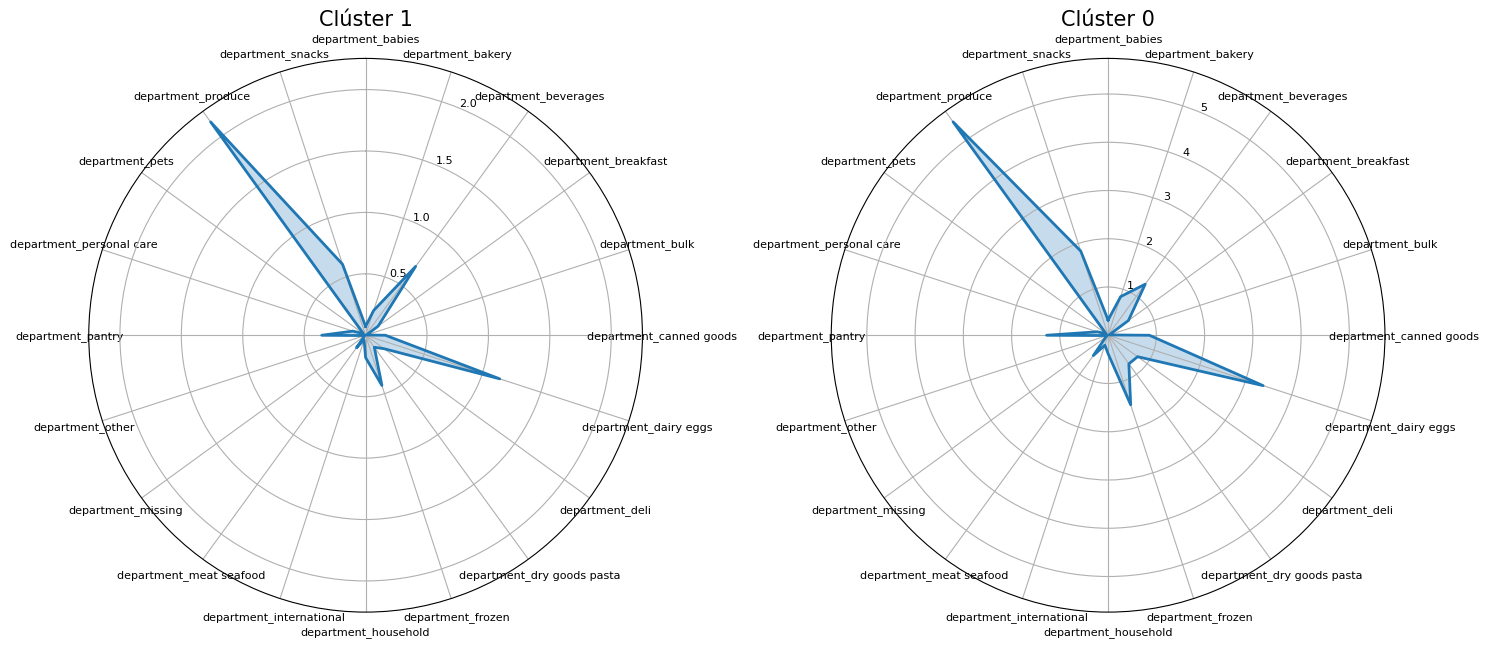

In [12]:
num_clusters = df_l1['Clusters_1'].nunique()
categories = department_columns

fig, axes = plt.subplots(1, num_clusters, subplot_kw={'polar': True}, figsize=(15, 7))

for i, cluster in enumerate(df_l1['Clusters_1'].unique()):
    values = df_l1[df_l1['Clusters_1'] == cluster][categories].mean().values.flatten().tolist()
    values += values[:1]  # Cerrar el gráfico de radar
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    ax = axes[i] if num_clusters > 1 else axes
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Clúster {cluster}', size=15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

#### **Análisis de Preferencias por Departamento**

A continuación, se analiza el comportamiento de los usuarios en ambos clústeres respecto a sus preferencias en distintos departamentos del supermercado.

---

##### **Preferencia en el Departamento de "Produce"**
- **Descripción**: Ambos clústeres muestran una preferencia destacada por el departamento de "Produce", pero esta es particularmente pronunciada en el **clúster 1**, donde tiene una mayor representación en comparación con otros departamentos.
- **Interpretación**: Esto sugiere que el **clúster 1** podría estar compuesto por usuarios que compran más productos frescos o que tienen hábitos de consumo orientados hacia alimentos naturales.

---

##### **Consumo en Otros Departamentos**
- **Clúster 1**:
  - Muestra un consumo algo mayor en los departamentos de "Beverages" (bebidas), "Breakfast" (desayuno), y "Canned Goods" (productos enlatados) en comparación con el clúster 0.
  - Esto indica una **tendencia a diversificar las compras en varias categorías**.
- **Clúster 0**:
  - Tiene una representación más baja en la mayoría de los otros departamentos, lo que sugiere un consumo más concentrado en unos pocos departamentos.

---

##### **Diferencias en Categorías Específicas**
- **Clúster 1**:
  - **Mayor representación** en los departamentos de:
    - **"Beverages"**: Indica un interés por bebidas, posiblemente como parte del consumo diario.
    - **"Breakfast"**: Refleja un enfoque en productos básicos para el desayuno.
  - Representa un perfil de consumidores que realizan compras más equilibradas en distintas categorías.
- **Clúster 0**:
  - **Menor representación** en las categorías mencionadas, lo que sugiere un enfoque de compra más específico y menos diversificado.

---

##### **Otros Departamentos con Baja Representación**
- **Departamentos**: "Meat Seafood" (carne y mariscos), "Frozen" (congelados), "Household" (hogar), y "International" (productos internacionales).
- **Interpretación**: Tienen una representación mínima o nula en ambos clústeres, lo que podría indicar que estos productos no son particularmente populares o no forman parte central de las compras típicas de los usuarios en estos grupos.

---

#### Conclusiones Generales

##### **Clúster 0**
- **Perfil de consumo**: Menos diversificado, con un consumo concentrado en unos pocos departamentos.
- **Interpretación**: Los usuarios en este clúster parecen tener un enfoque de compra más específico y orientado a necesidades puntuales.

##### **Clúster 1**
- **Perfil de consumo**: Más variado, con un interés destacado en:
  - Productos frescos ("Produce").
  - Bebidas ("Beverages").
  - Artículos para el desayuno ("Breakfast").
- **Interpretación**: Representa consumidores que buscan opciones para el consumo diario o que tienen un patrón de compra más equilibrado entre distintas categorías.


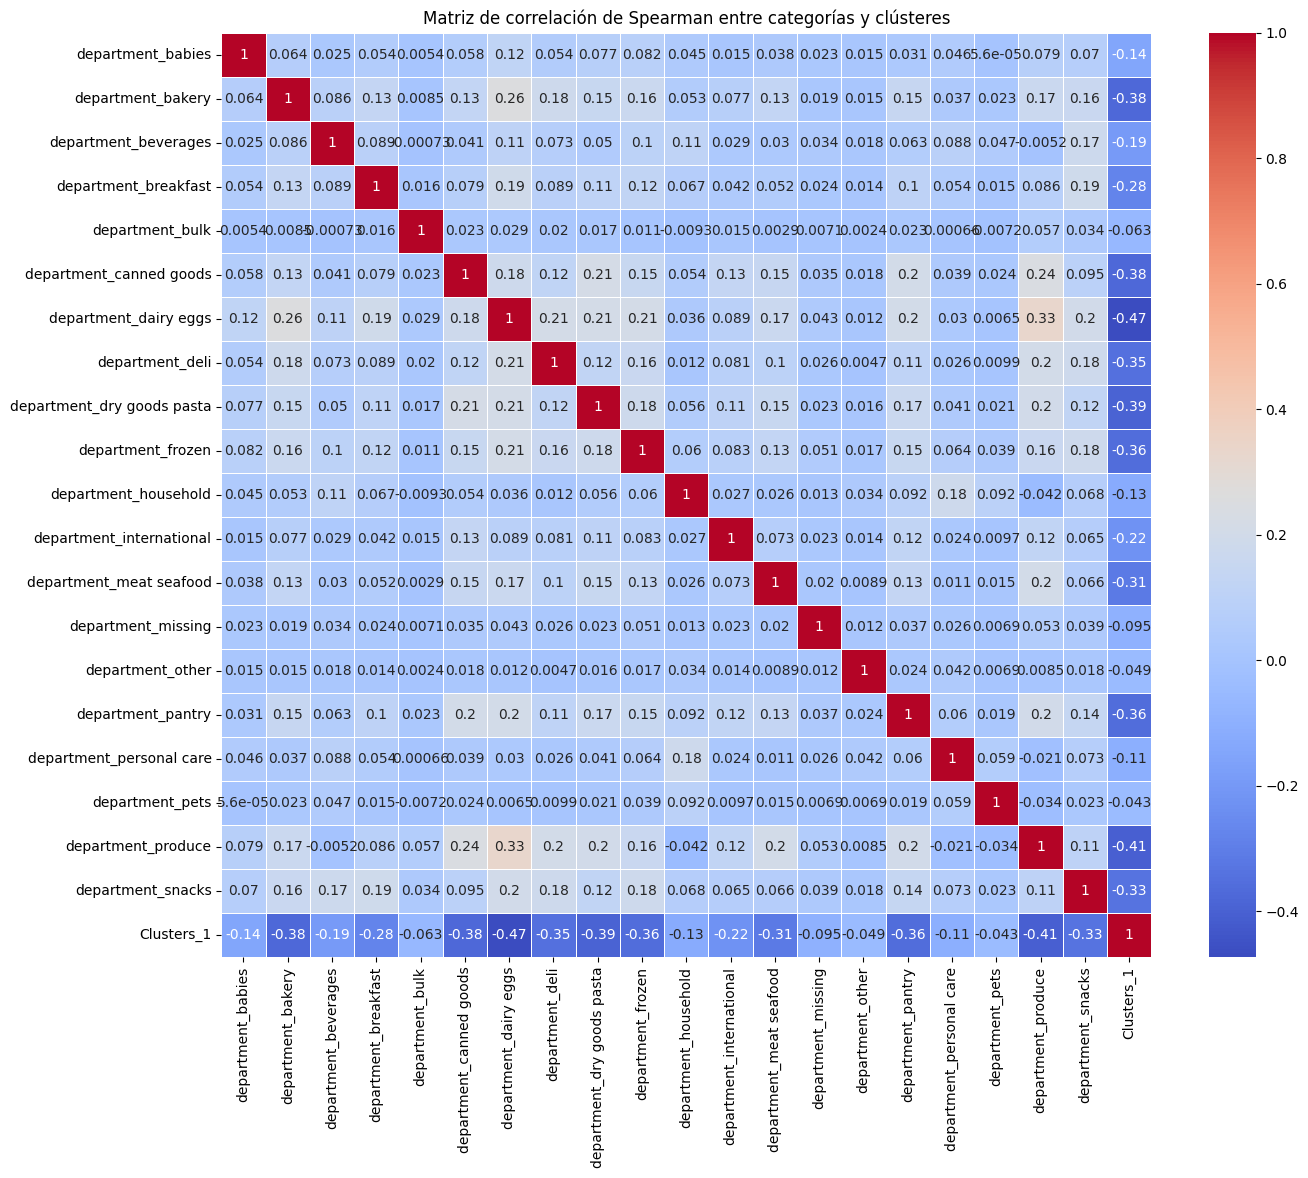

In [13]:
correlations = df_l1[department_columns + ['Clusters_1']].corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de Spearman entre categorías y clústeres')
plt.show()

#### Análisis de Correlaciones entre Departamentos

A continuación, se detallan las correlaciones significativas encontradas entre distintos departamentos, lo que refleja patrones de comportamiento de los consumidores en un supermercado.

---

##### **department_canned goods y department_bulk**
- **Correlación**: 0.79.
- **Descripción**: Estos departamentos están altamente relacionados, lo que indica que los consumidores que compran productos enlatados también tienden a adquirir productos a granel.
- **Patrón de compra**: Refleja un comportamiento orientado al abastecimiento o almacenamiento.
- **Posible estrategia**: Diseñar promociones cruzadas entre productos enlatados y a granel para incentivar compras en grandes cantidades.

---

##### **department_household y department_international**
- **Correlación**: 0.92.
- **Descripción**: Los consumidores interesados en productos para el hogar también suelen adquirir productos internacionales.
- **Patrón de compra**: Característico de compradores que buscan variedad o productos especializados.
- **Posible estrategia**: Crear paquetes temáticos que combinen productos para el hogar con artículos internacionales para aumentar el ticket promedio.

---

##### **department_deli y department_dairy eggs**
- **Correlación**: 0.82.
- **Descripción**: Existe una fuerte asociación entre la compra de productos frescos de delicatessen y productos lácteos.
- **Patrón de compra**: Indica un hábito común relacionado con alimentos perecederos.
- **Posible estrategia**: Ofrecer combos o promociones que incluyan productos de ambos departamentos para incentivar compras adicionales.

---

#### Observaciones Generales
- Las altas correlaciones entre departamentos, como **canned goods** y **bulk**, ofrecen oportunidades para promociones combinadas que capten a consumidores que buscan abastecerse.
- **Sugerencias**:
  - Aprovechar las relaciones entre departamentos para diseñar campañas personalizadas.
  - Implementar estrategias de marketing como promociones cruzadas y descuentos temáticos para aumentar las ventas y la fidelización.



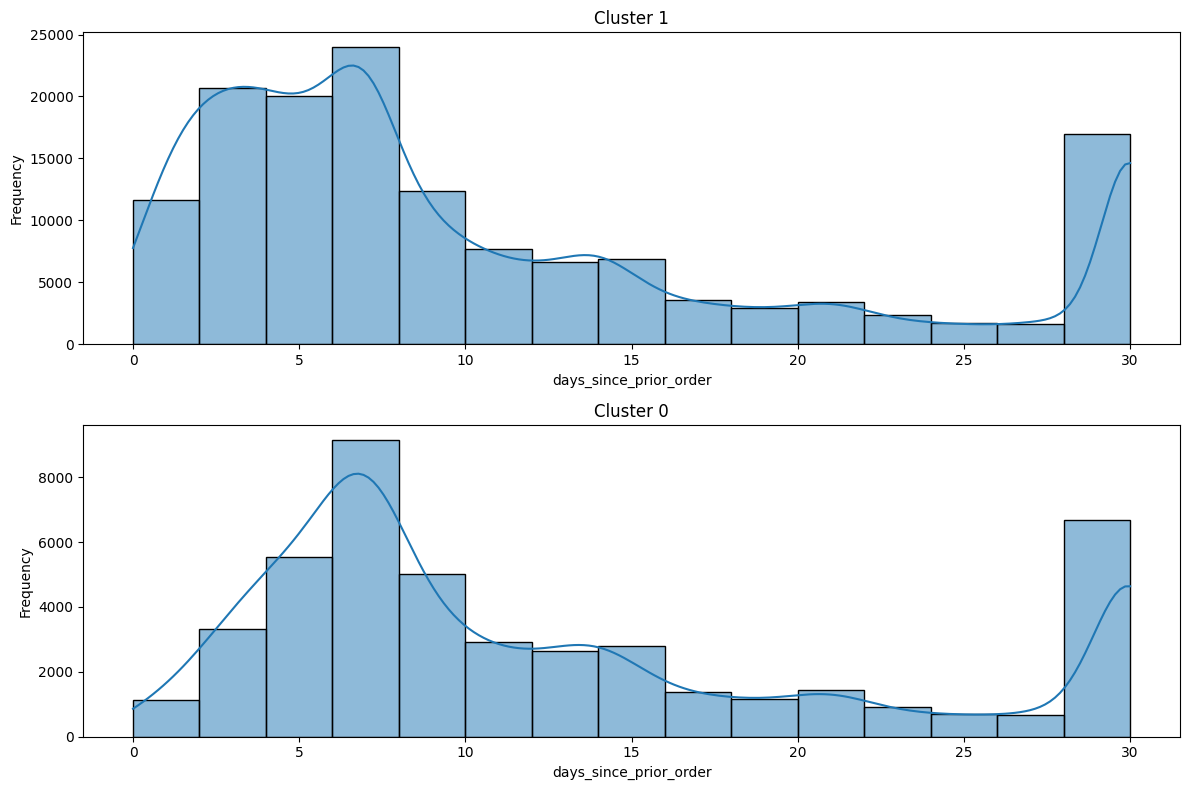

In [14]:
clusters_1 = df_l1['Clusters_1'].unique()
n_clusters = len(clusters_1)

n_cols = 1
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

if n_rows == 1:
    axes = [axes]

for i, cluster in enumerate(clusters_1):
    sns.histplot(df_l1[df_l1['Clusters_1'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')
    axes[i].set_xlabel('days_since_prior_order')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Análisis de los Clusters

En el gráfico anterior se representa la distribución de los días desde el pedido anterior (`days_since_prior_order`) para los dos clusters determinados. A continuación, se detalla el análisis para cada cluster.

---

##### **Cluster 0**
- **Distribución**: Tiene un pico inicial entre 0 y 7 días, lo que indica que muchos usuarios de este cluster realizan compras frecuentes (semanales).
- **Tendencia decreciente**: Después del pico, la frecuencia disminuye hasta estabilizarse en intervalos más largos.
- **Pico secundario**: Hay un aumento significativo alrededor del día 30, lo que sugiere que una proporción considerable de usuarios en este grupo realiza compras mensuales.
- **Posible denominación**: **"Compradores frecuentes-mensuales"**, ya que combinan patrones de compras semanales y mensuales.

---

##### **Cluster 1**
- **Distribución**: Presenta una forma más simétrica, con un pico claro entre 4 y 7 días.
- **Menor dispersión**: La distribución sugiere que los usuarios tienen un comportamiento de compra más consistente y centrado en ciclos semanales.
- **Pico en el día 30**: Aunque menos marcado que en el Cluster 0, también hay un pequeño aumento al final, reflejando algunos compradores con patrones mensuales.
- **Posible denominación**: **"Compradores regulares-semanales"**, debido a su hábito más consistente en intervalos cortos.

---

#### Características clave para predicciones

##### **Cluster 0**
- **Hábitos variados**: Frecuencia semanal combinada con compras mensuales.
- **Estrategias sugeridas**:
  - Promociones semanales.
  - Cupones o incentivos específicos para compras mensuales.

##### **Cluster 1**
- **Alta regularidad semanal**: Usuarios con patrones de compra predecibles en ciclos cortos.
- **Estrategias sugeridas**:
  - Aumentar el ticket promedio por visita con descuentos por volumen.
  - Ofertas que refuercen la frecuencia de compras.


### Clustering - K-Means - n=3

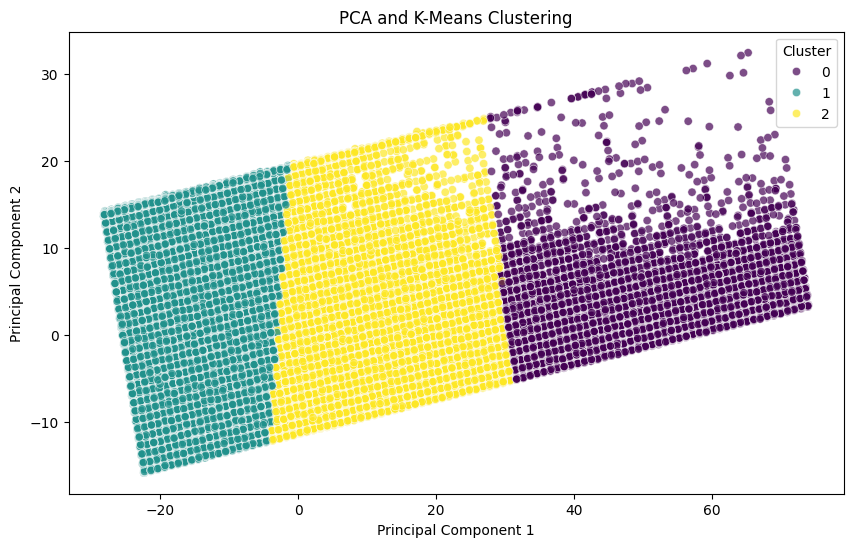

In [15]:
n_clusters = 3

kmeans2 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans2.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c2 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c2['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c2, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [16]:
df_l2 = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

In [17]:
df_l2['Clusters_2'] = kmeans2.labels_

C:\Users\Matias\AppData\Local\Temp\ipykernel_44140\1870083769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l2['Clusters_2'] = kmeans2.labels_


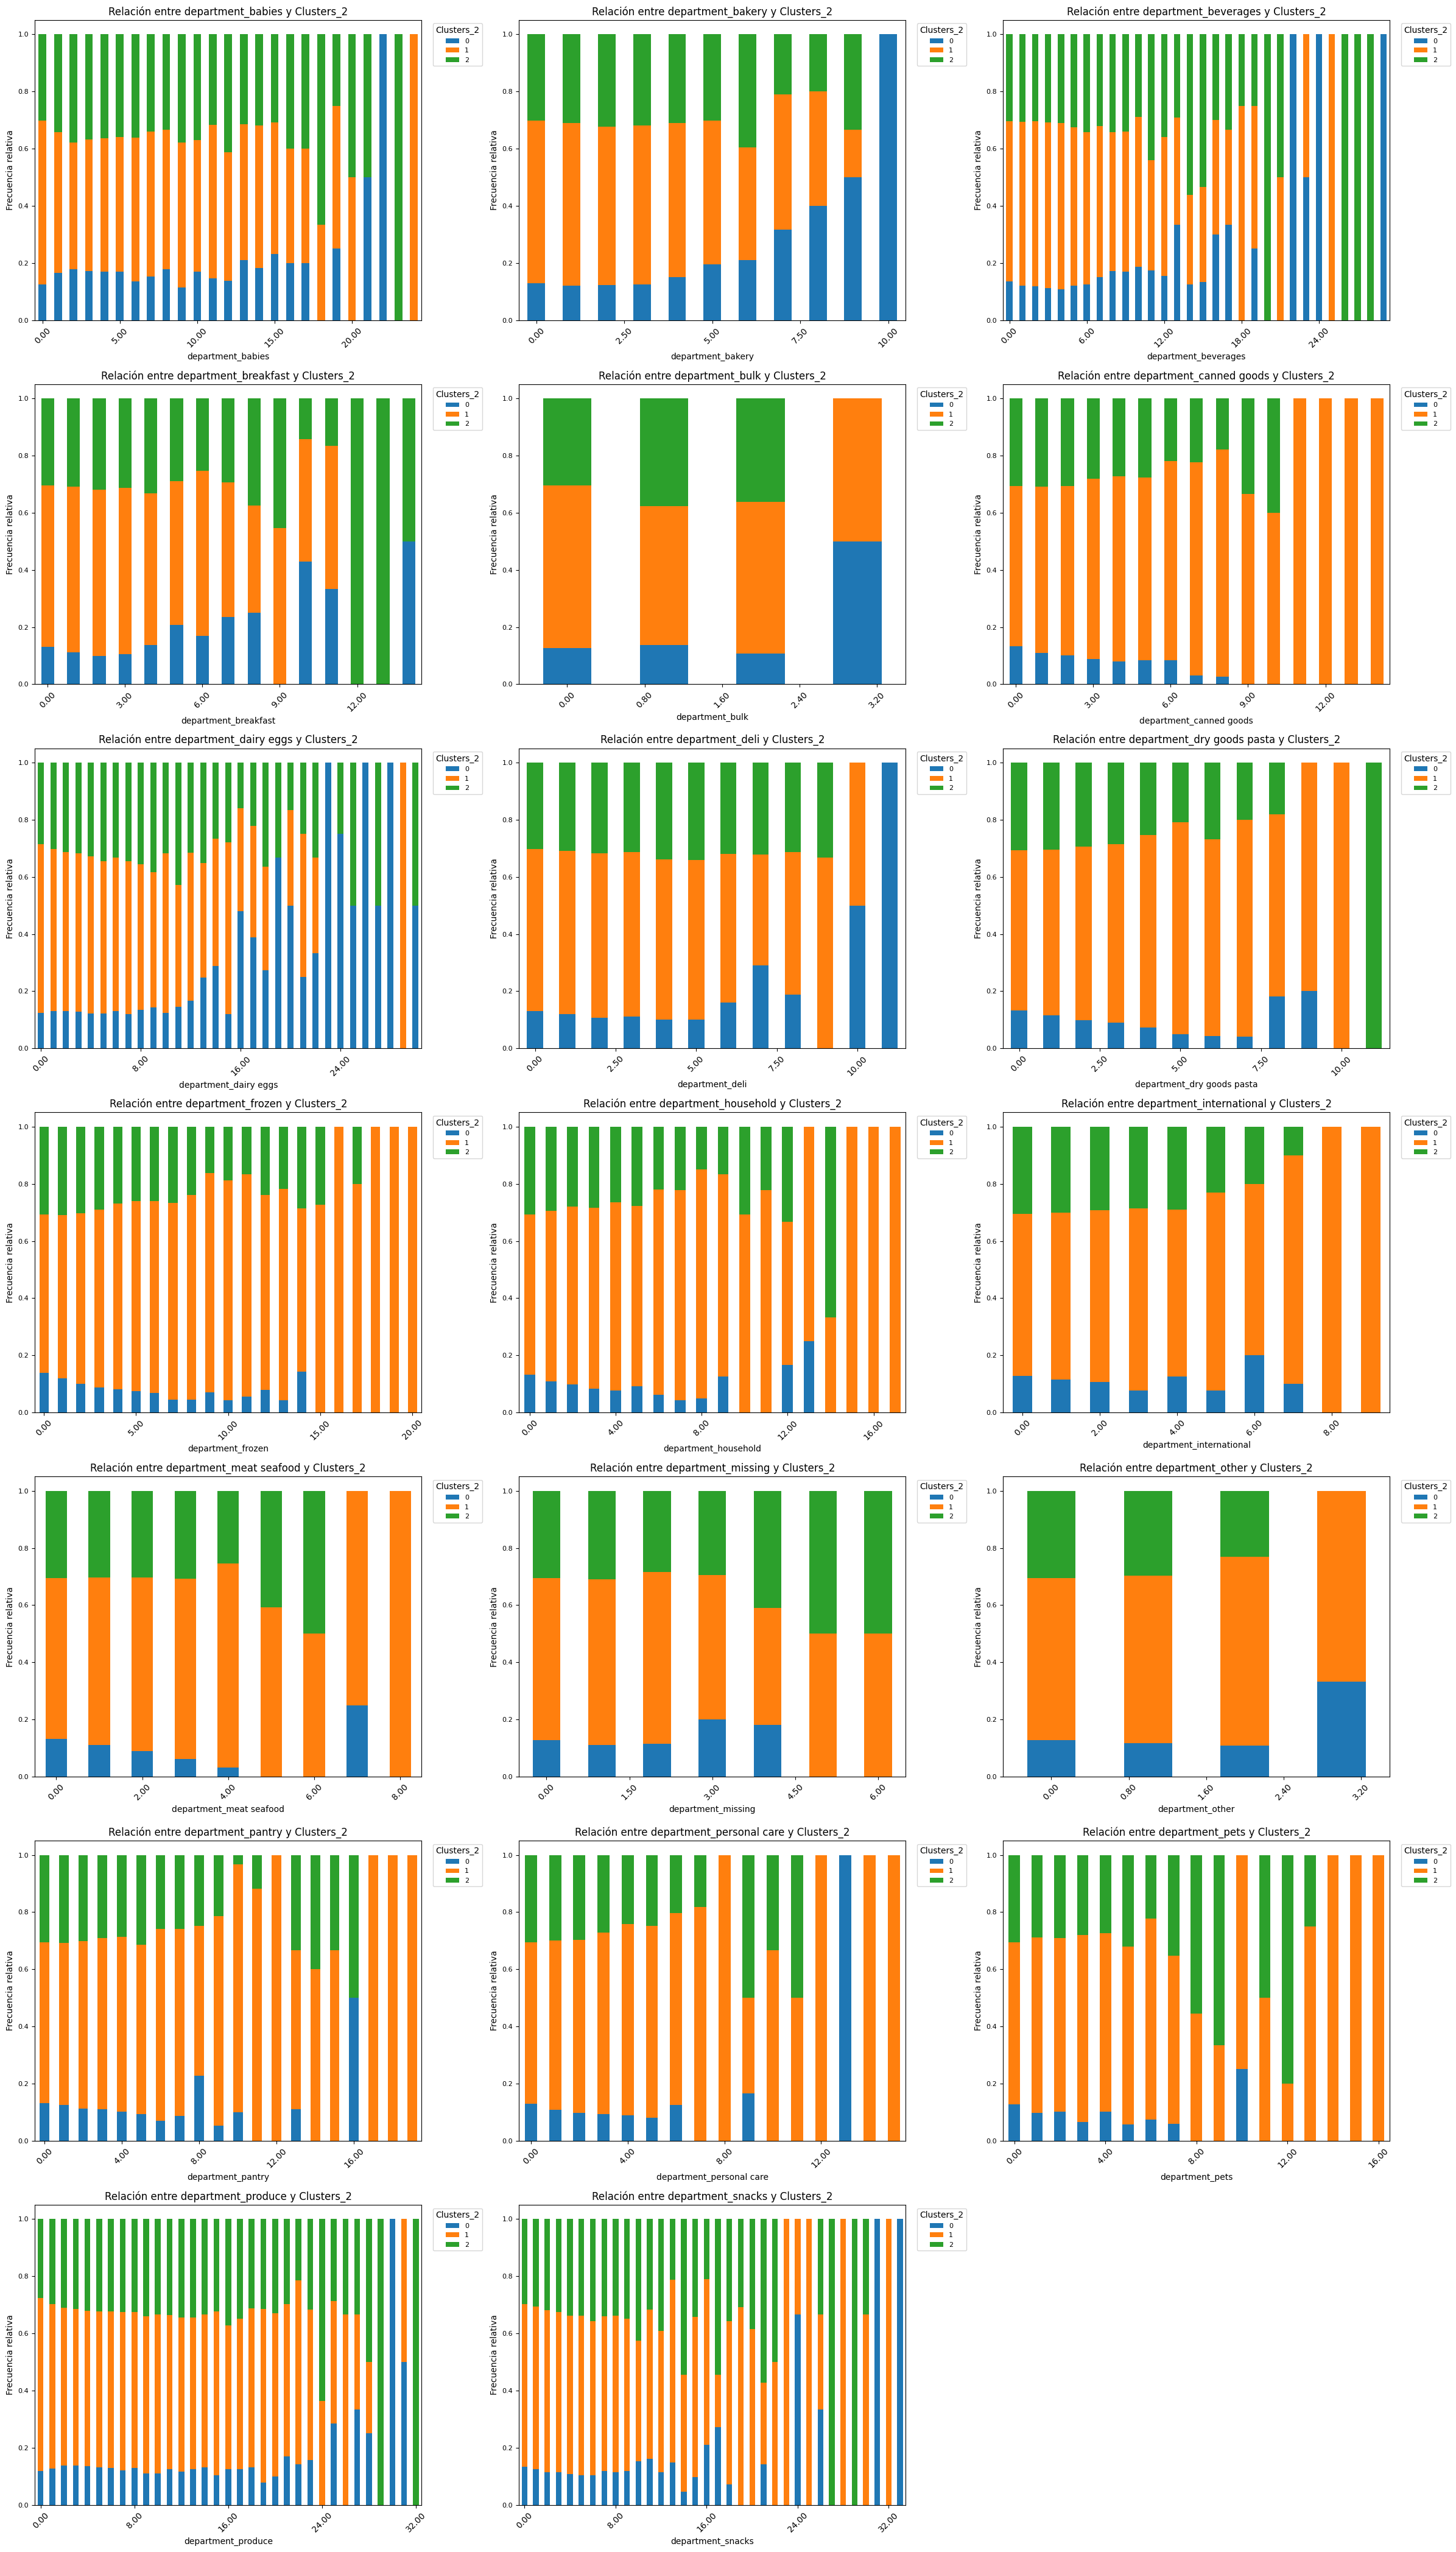

In [18]:
department_columns = [col for col in df_l2.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df_l2.groupby(columna)['Clusters_2'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_2', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_2', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

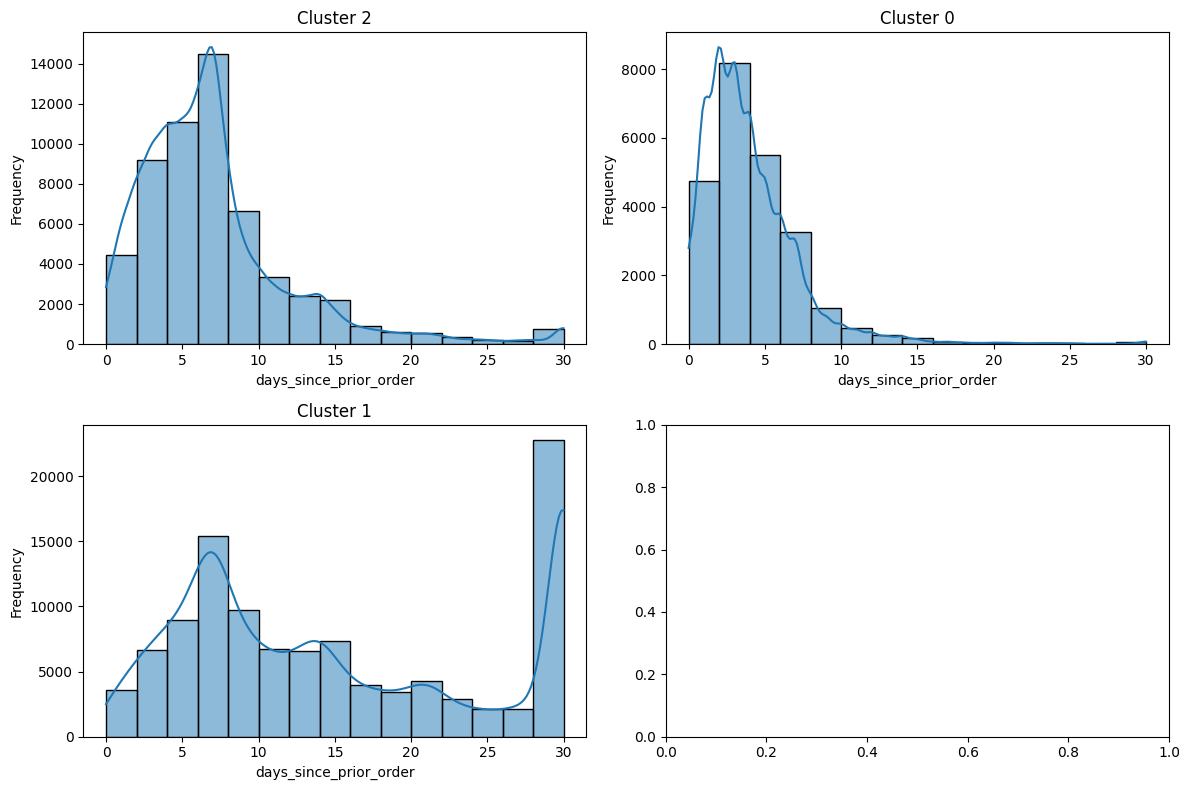

In [41]:
clusters = df_l2['Clusters_2'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df_l2[df_l2['Clusters_2'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

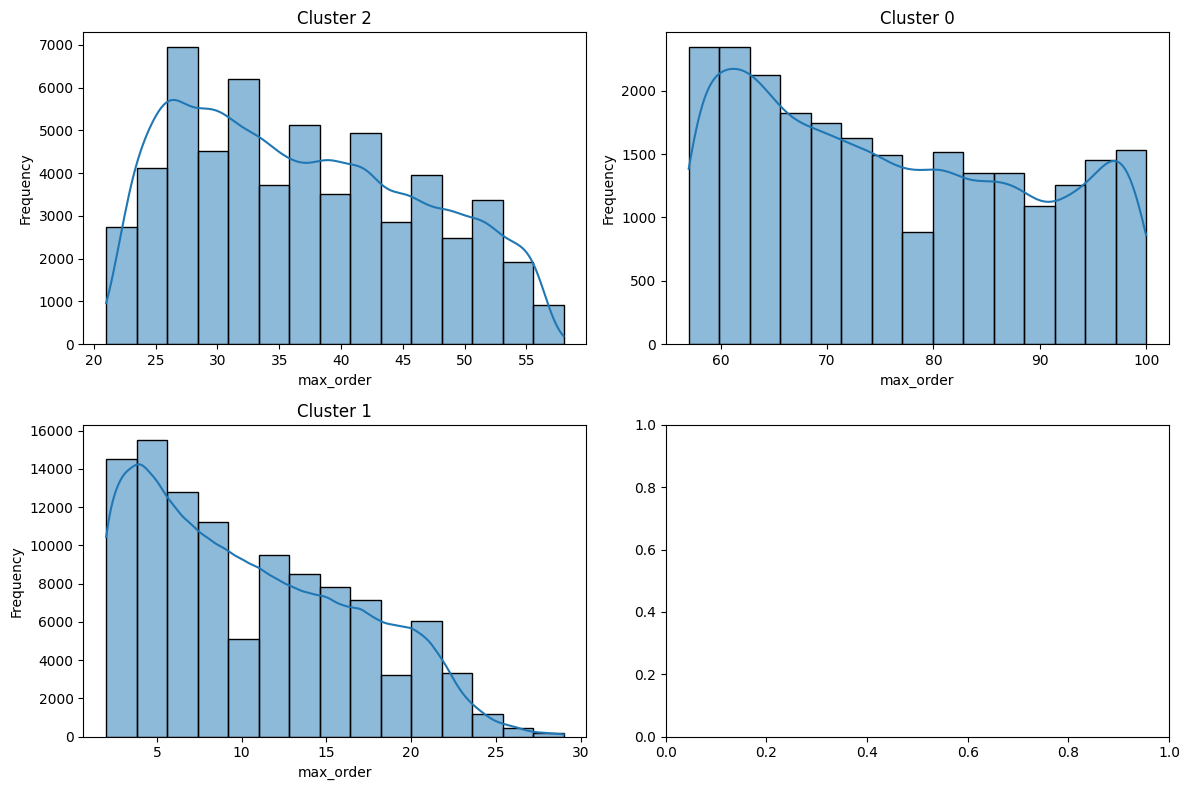

In [42]:
clusters = df_l2['Clusters_2'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df_l2[df_l2['Clusters_2'] == cluster]['max_order'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('max_order')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

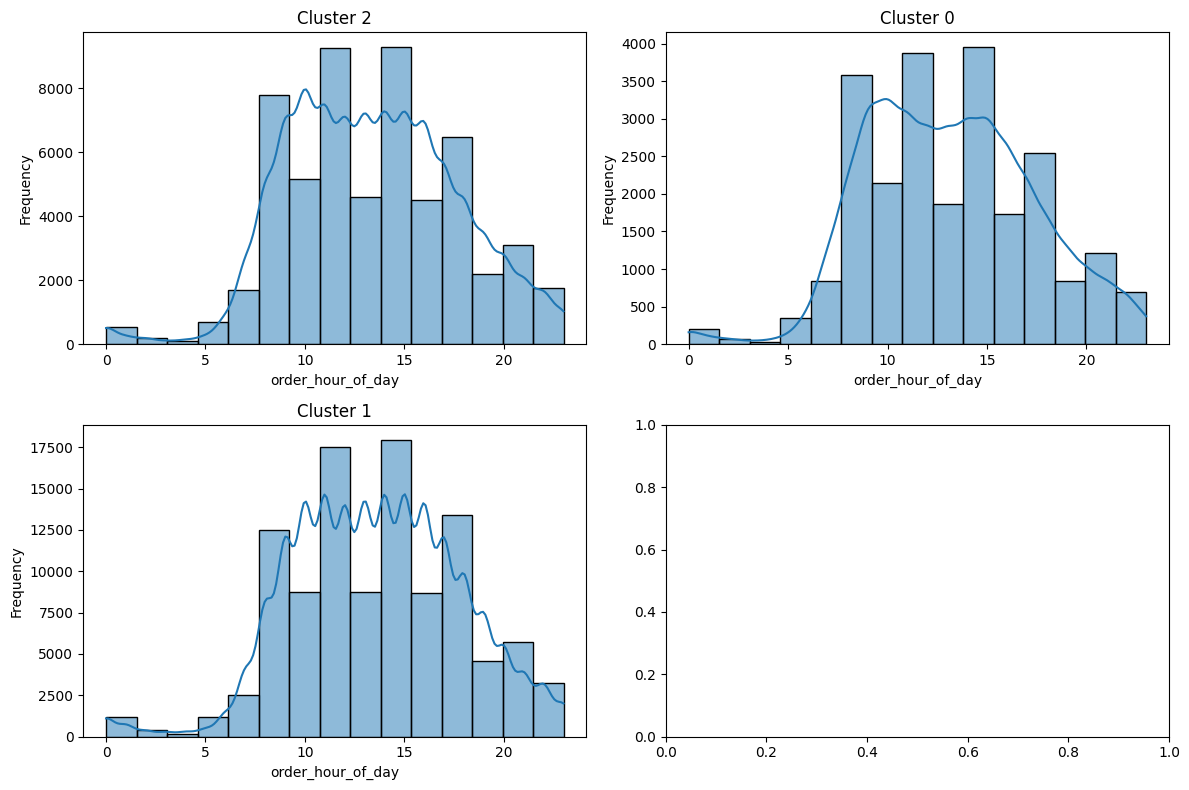

In [43]:
clusters = df_l2['Clusters_2'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df_l2[df_l2['Clusters_2'] == cluster]['order_hour_of_day'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('order_hour_of_day')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:
stats = df_l2.groupby('Clusters_2').agg(['mean', 'median'])

mode_df = df_l2.groupby('Clusters_2').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_df.columns = pd.MultiIndex.from_product([mode_df.columns, ['mode']])

stats = pd.concat([stats, mode_df], axis=1)

stats_formatted = stats.style.format("{:.2f}").set_caption("Estadísticas Descriptivas por Clúster").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

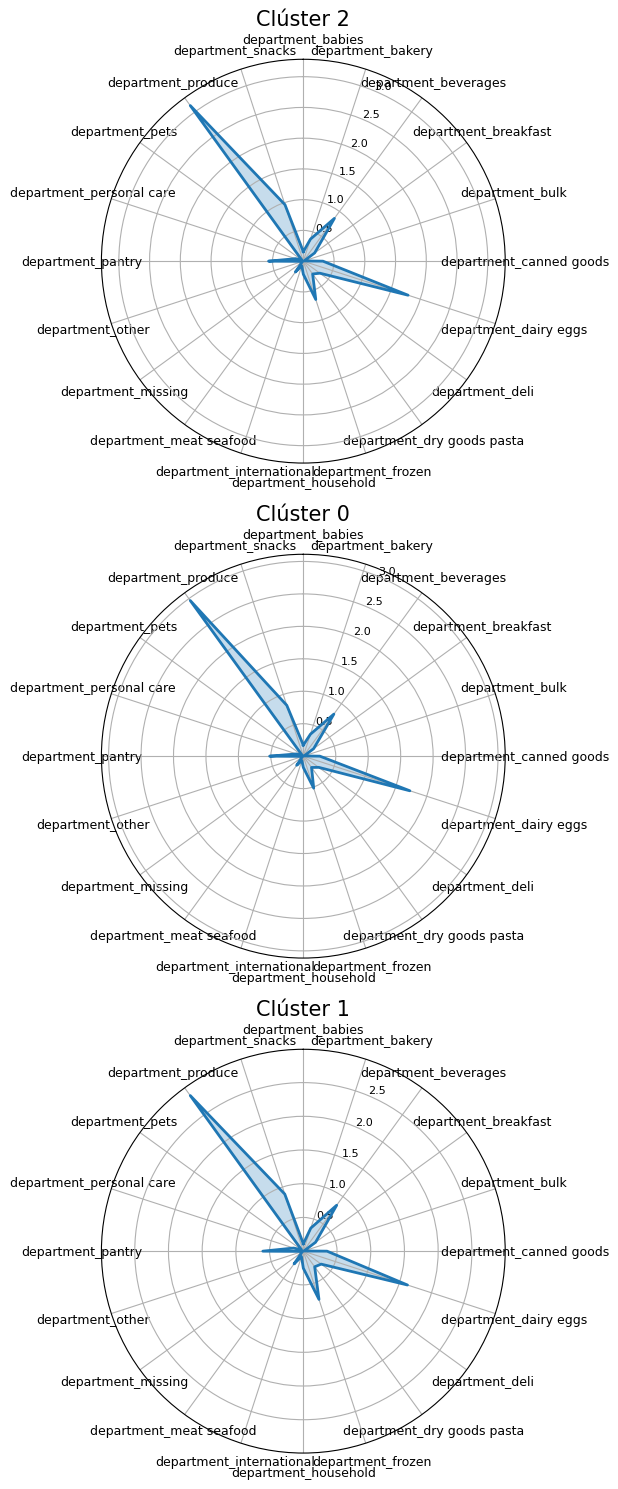

In [44]:
num_clusters = df_l2['Clusters_2'].nunique()
categories = department_columns

fig, axes = plt.subplots(num_clusters, 1, subplot_kw={'polar': True}, figsize=(10, 15))

for i, cluster in enumerate(df_l2['Clusters_2'].unique()):
    values = df_l2[df_l2['Clusters_2'] == cluster][categories].mean().values.flatten().tolist()
    values += values[:1] 
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]
    
    ax = axes[i] if num_clusters > 1 else axes
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(f'Clúster {cluster}', size=15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=9)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

#### Conclusion Clusterizacion n=3

#### Solapamiento entre clusters
Los histogramas muestran una **alta superposición en los valores de "días desde la última compra"** entre los clusters, especialmente entre los clusters 0 y 2. Esto indica que los clusters no están claramente diferenciados y que no existe una segmentación clara que permita identificar comportamientos distintos entre los grupos.

#### Distribuciones no homogéneas dentro de los clusters
El cluster 1 presenta una **distribución peculiar**, con un pico significativo en el extremo de los 30 días, lo que indica un patrón de compras mensuales. Sin embargo, este mismo cluster también tiene una cantidad considerable de compras más frecuentes, lo que sugiere una falta de cohesión dentro del cluster. Esto dificulta interpretaciones consistentes y una segmentación adecuada.

#### Falta de utilidad práctica para la segmentación
Para que una clusterización sea útil, cada cluster debe representar un grupo de clientes con **patrones claramente diferenciados**. En este caso, no hay suficiente evidencia de que los clusters identificados sean representativos de patrones distintos de comportamiento. Por ejemplo, no se distingue adecuadamente entre clientes que compran semanalmente, quincenalmente o mensualmente.

#### Desequilibrio en la frecuencia de observaciones entre clusters
Hay una **disparidad significativa en el tamaño de los clusters**, con el cluster 1 dominando claramente en términos de frecuencia. Esto puede sesgar cualquier análisis posterior y limitar la utilidad de los clusters más pequeños (como el cluster 2).

Por lo tanto, se decide avanzar con nuevos escenarios de clusterizacion

### Clustering - K-Means - n=5

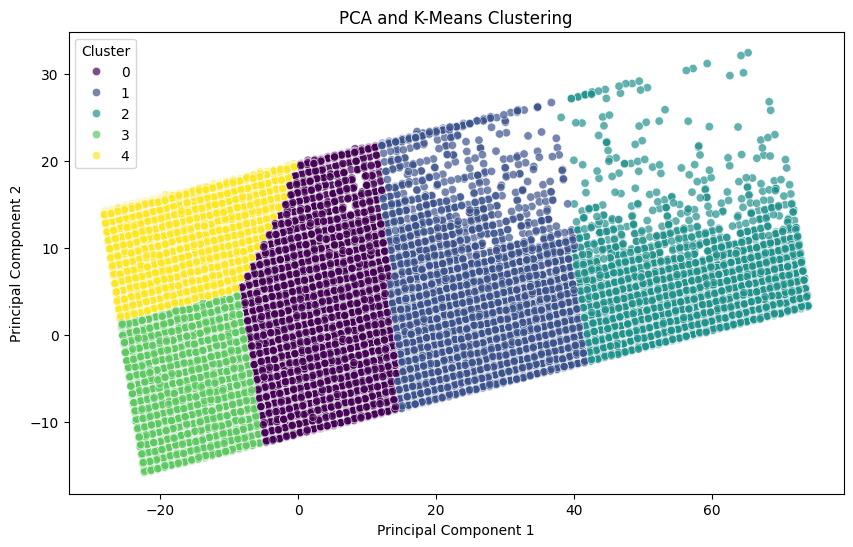

In [22]:
n_clusters = 5

kmeans3 = KMeans(n_clusters=n_clusters, random_state=100)
labels = kmeans3.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

df_c3 = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_c3['Cluster'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_c3, palette='viridis', alpha=0.7)
plt.title('PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [23]:
df_l3 = df[['department_babies', 'department_bakery', 'department_beverages', 'department_breakfast', 'department_bulk', 
        'department_canned goods', 'department_dairy eggs', 'department_deli', 
        'department_dry goods pasta', 'department_frozen', 'department_household', 
        'department_international', 'department_meat seafood', 'department_missing', 
        'department_other', 'department_pantry', 'department_personal care', 
        'department_pets', 'department_produce', 'department_snacks', 'max_order', 'order_hour_of_day', 'days_since_prior_order']]

In [24]:
df_l3['Clusters_3'] = kmeans3.labels_

C:\Users\Matias\AppData\Local\Temp\ipykernel_44140\2088080857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l3['Clusters_3'] = kmeans3.labels_


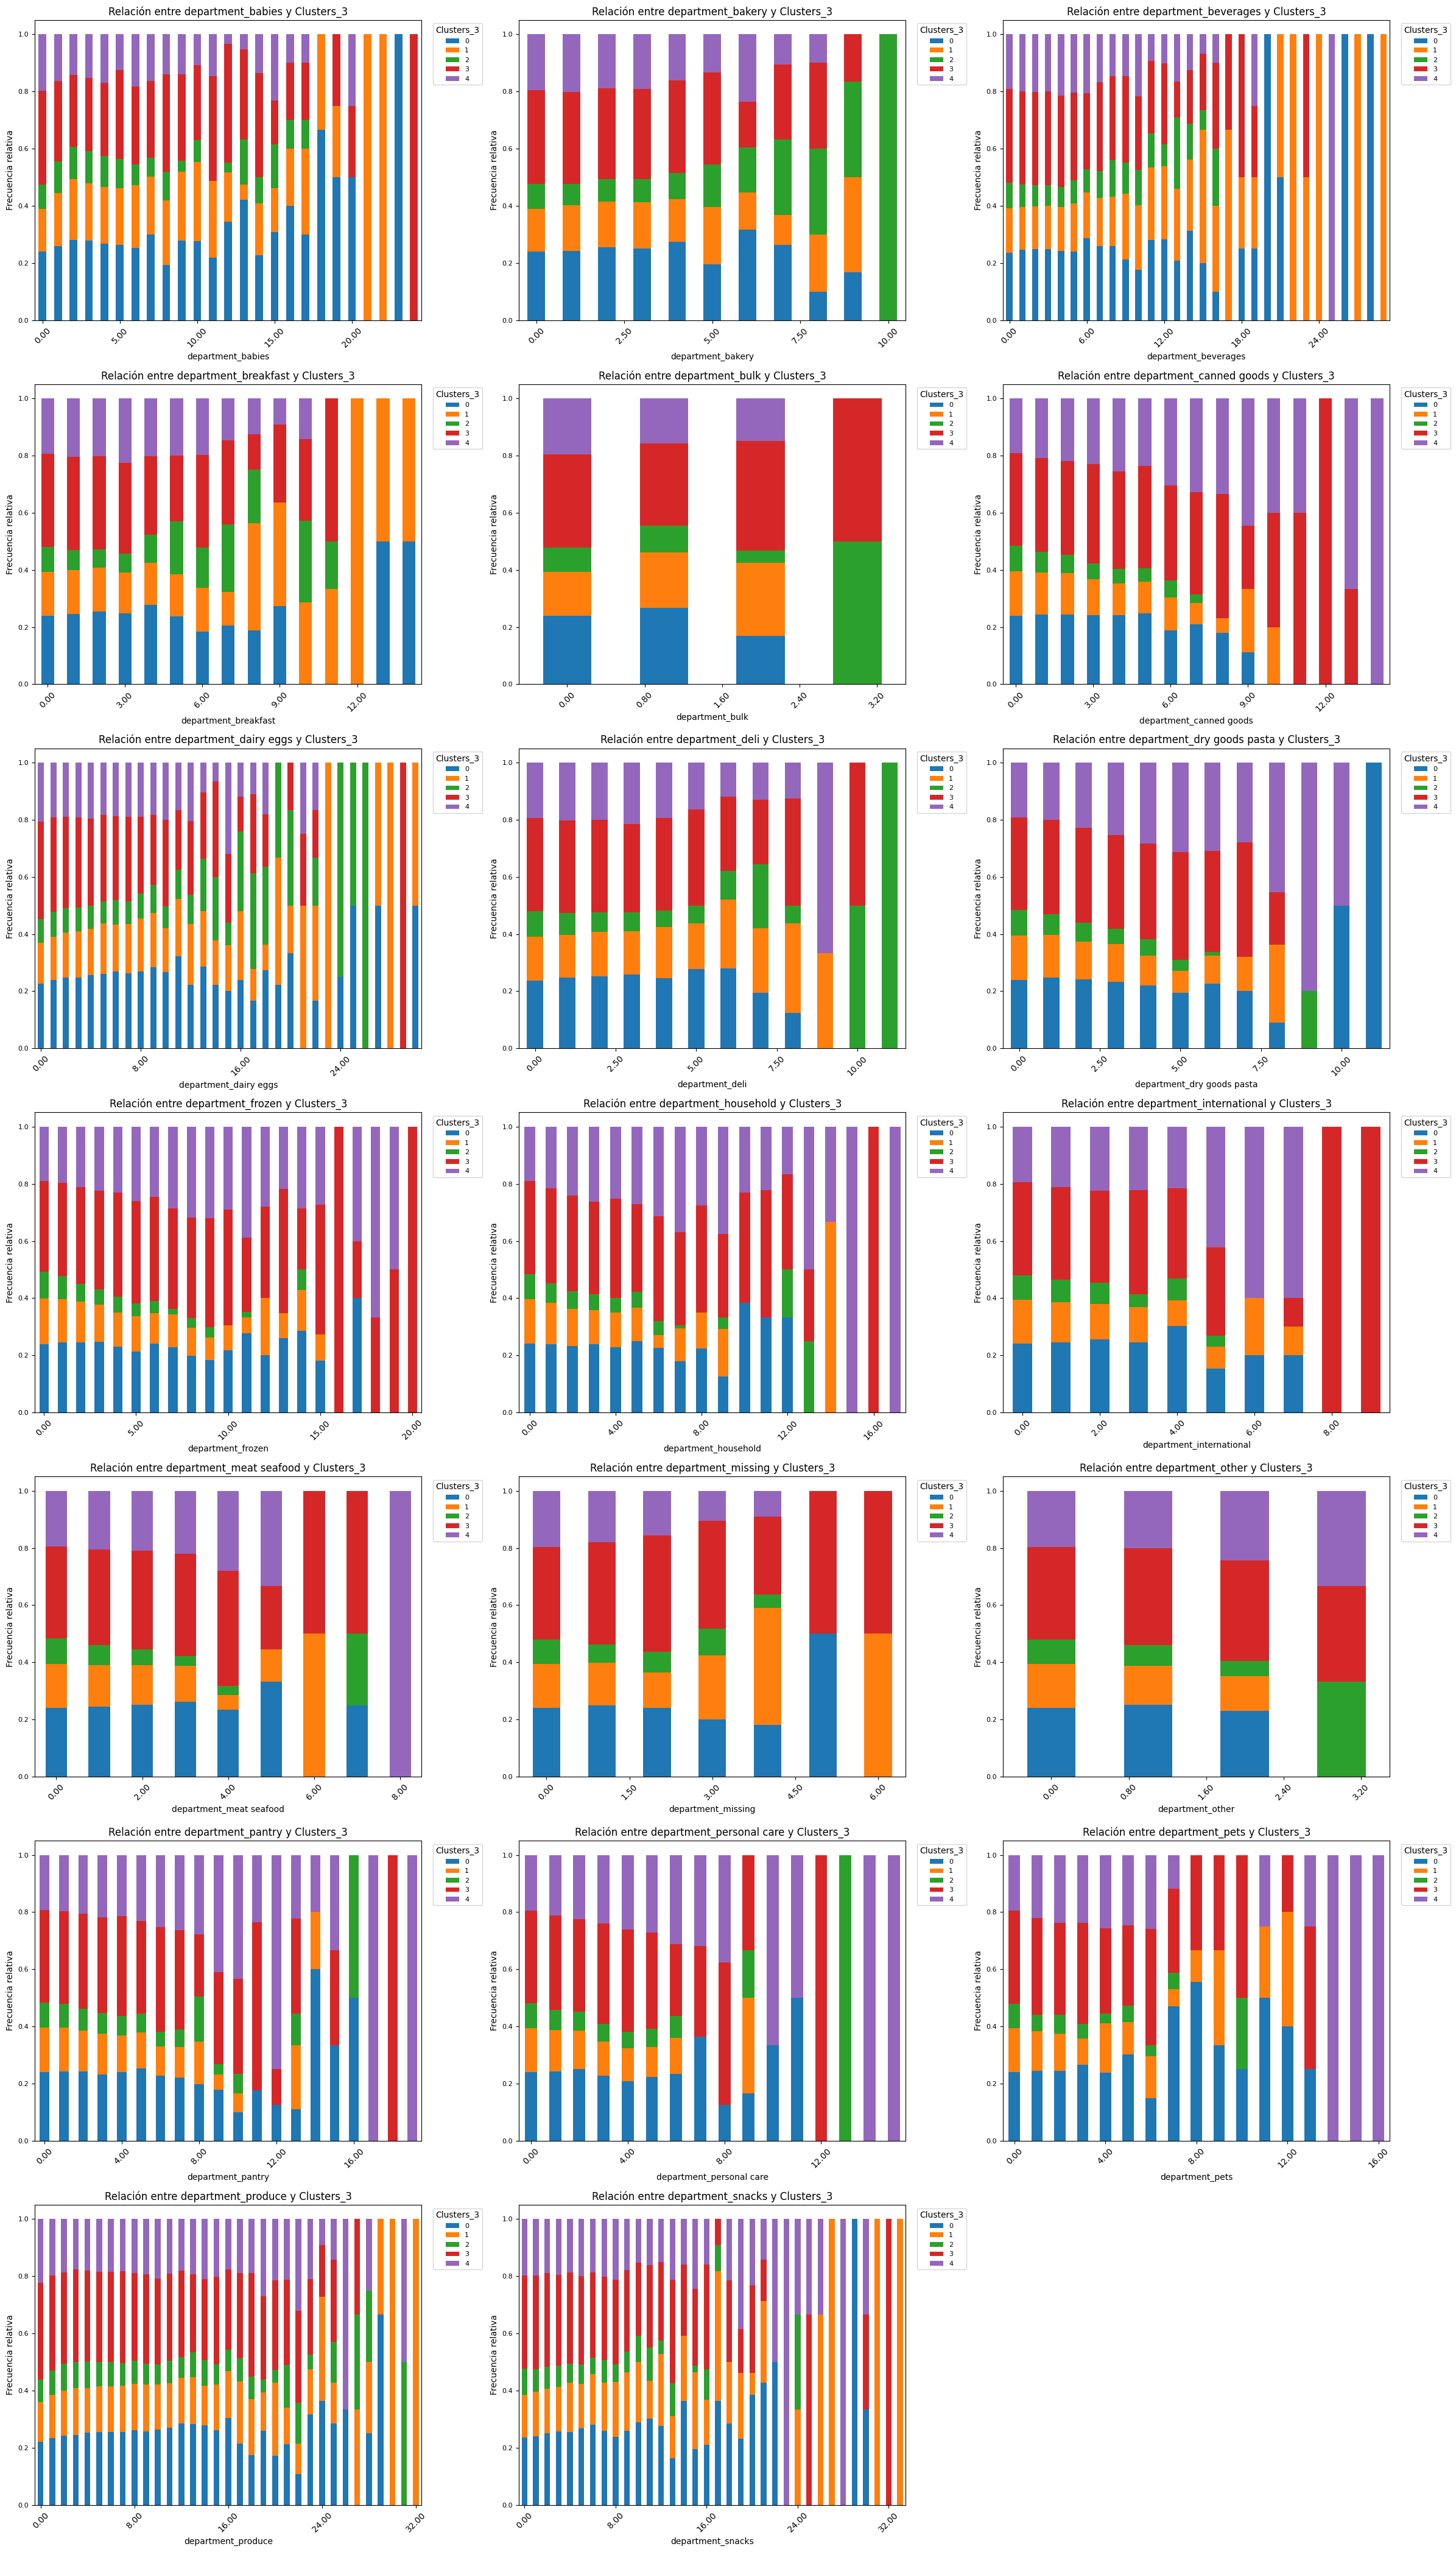

In [25]:
department_columns = [col for col in df_l3.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df_l3.groupby(columna)['Clusters_3'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_3', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_3', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

In [26]:
stats = df_l3.groupby('Clusters_3').agg(['mean', 'median'])

mode_df = df_l3.groupby('Clusters_3').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
mode_df.columns = pd.MultiIndex.from_product([mode_df.columns, ['mode']])

stats = pd.concat([stats, mode_df], axis=1)

stats_formatted = stats.style.format("{:.2f}").set_caption("Estadísticas Descriptivas por Clúster").set_properties(**{
    'text-align': 'center'}).set_table_styles([{
    'selector': 'caption',
    'props': 'caption-side: top; font-size:16px; font-weight:bold; text-align:center;'
}])

stats_formatted

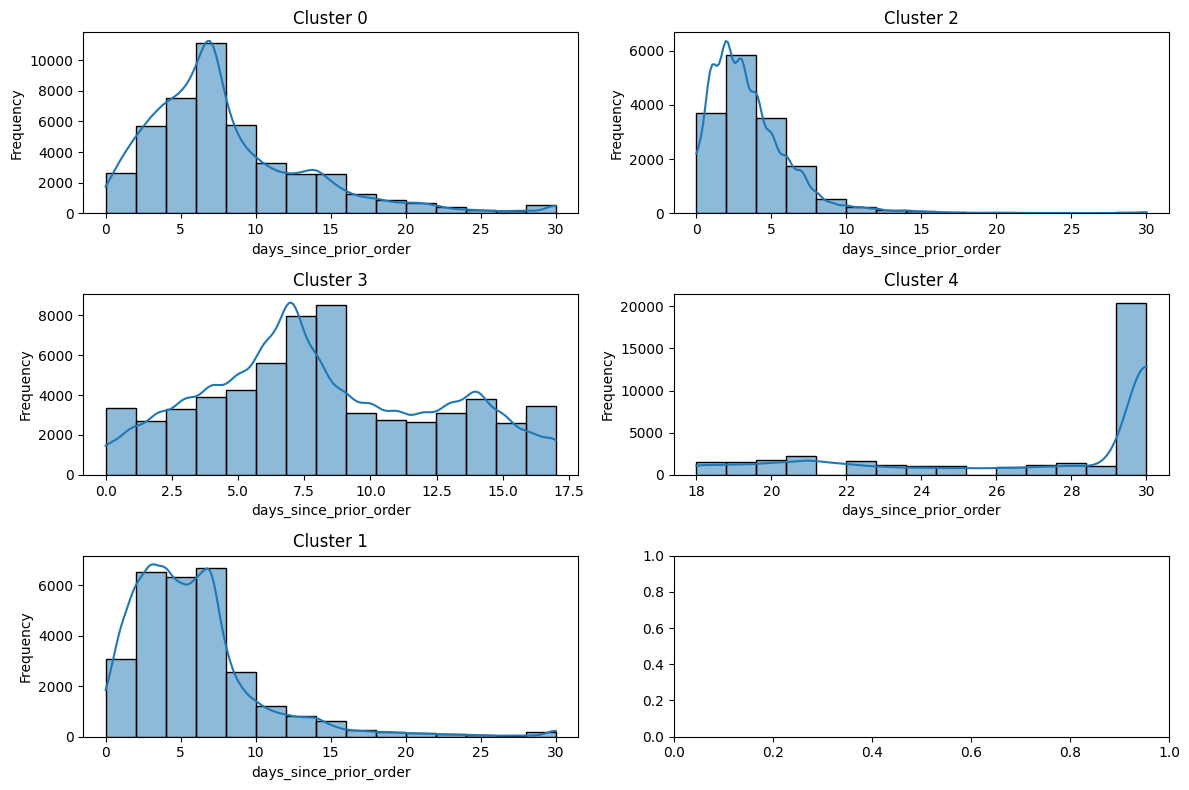

In [ ]:
clusters = df_l3['Clusters_3'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df_l3[df_l3['Clusters_3'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

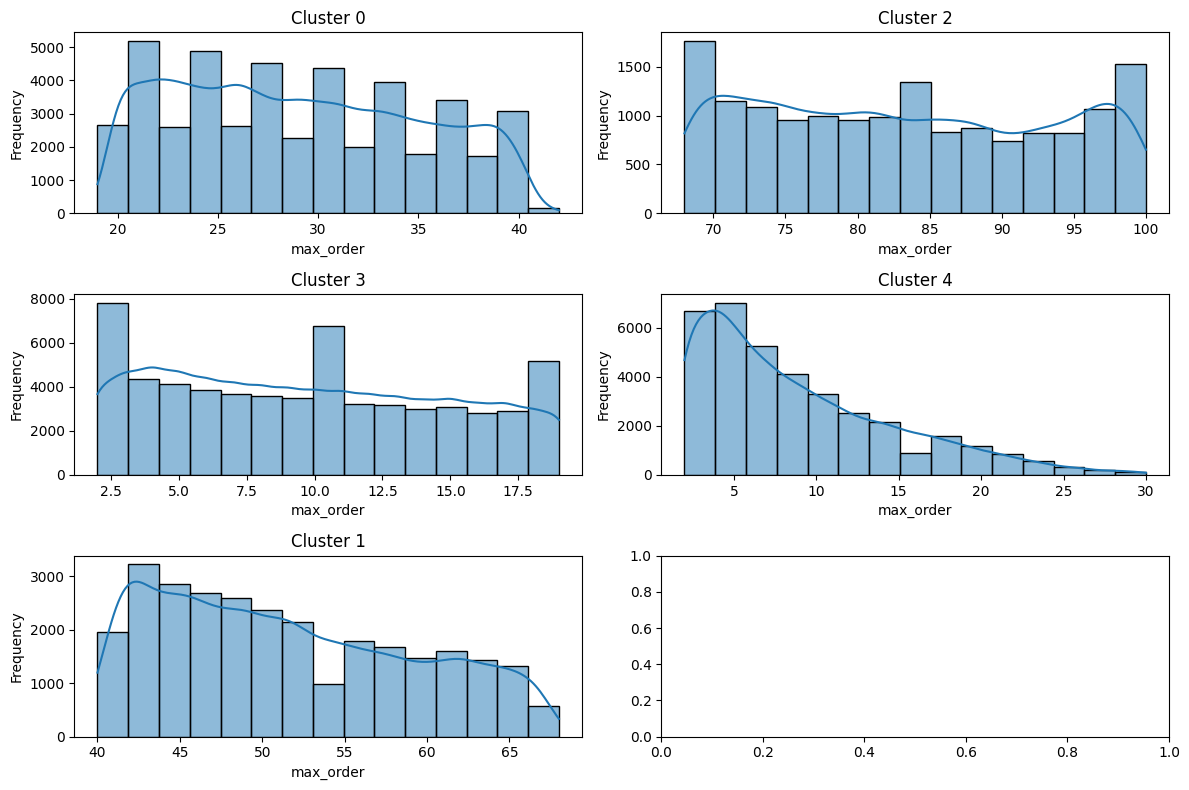

In [28]:
clusters = df_l3['Clusters_3'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df_l3[df_l3['Clusters_3'] == cluster]['max_order'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('max_order')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

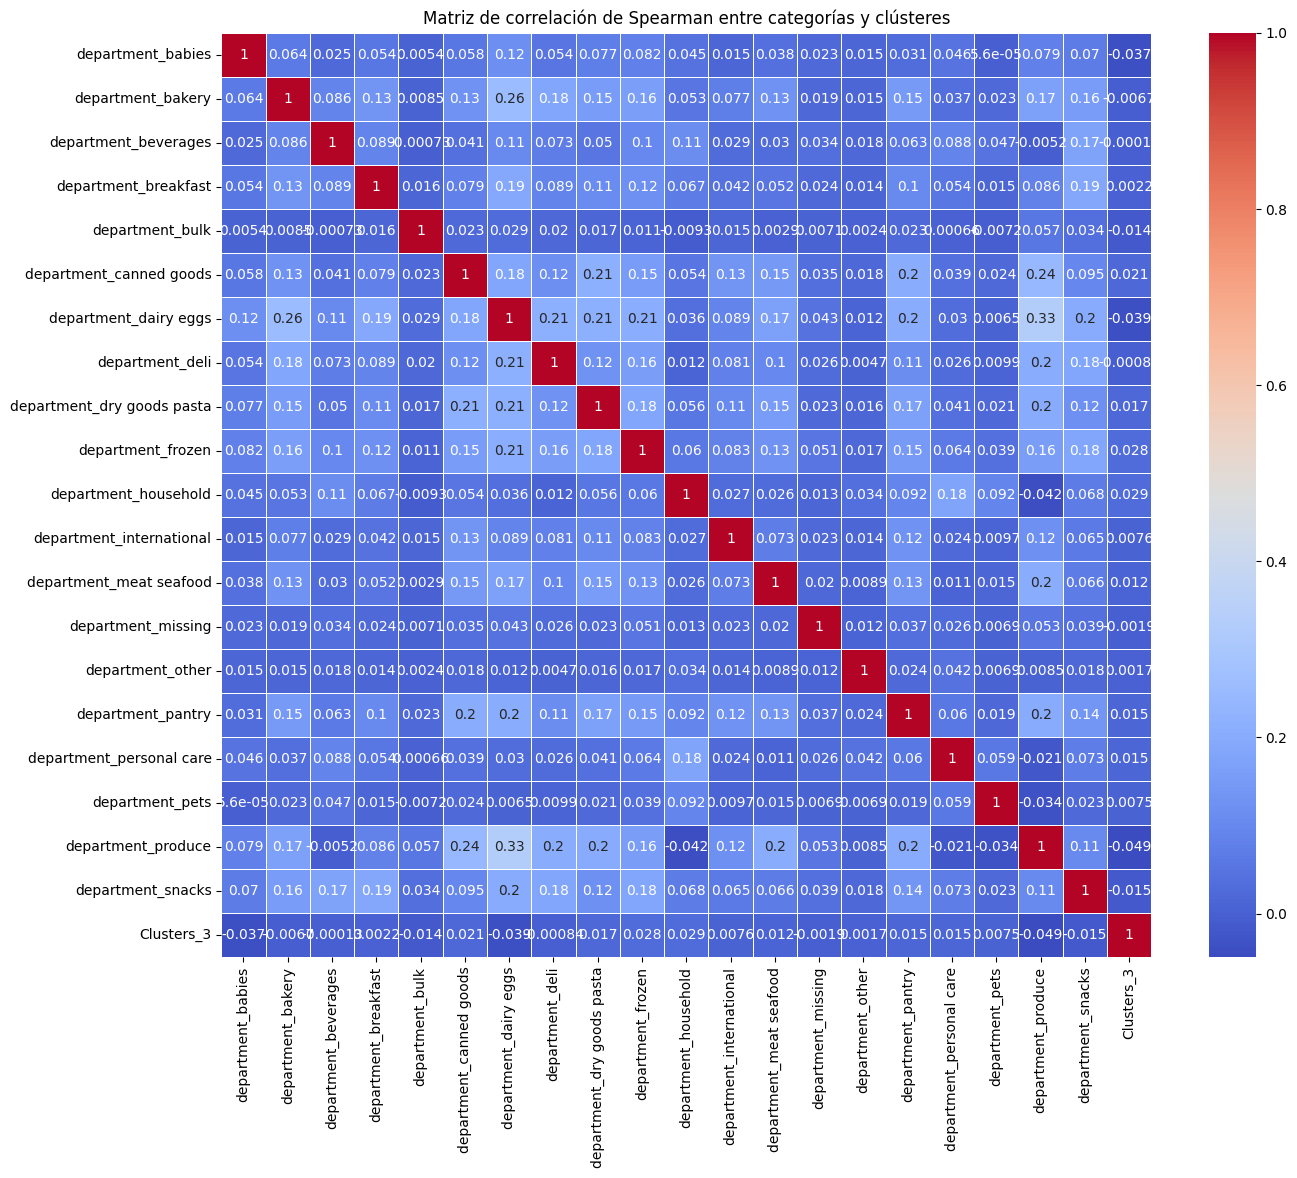

In [29]:
correlations = df_l3[department_columns + ['Clusters_3']].corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación de Spearman entre categorías y clústeres')
plt.show()

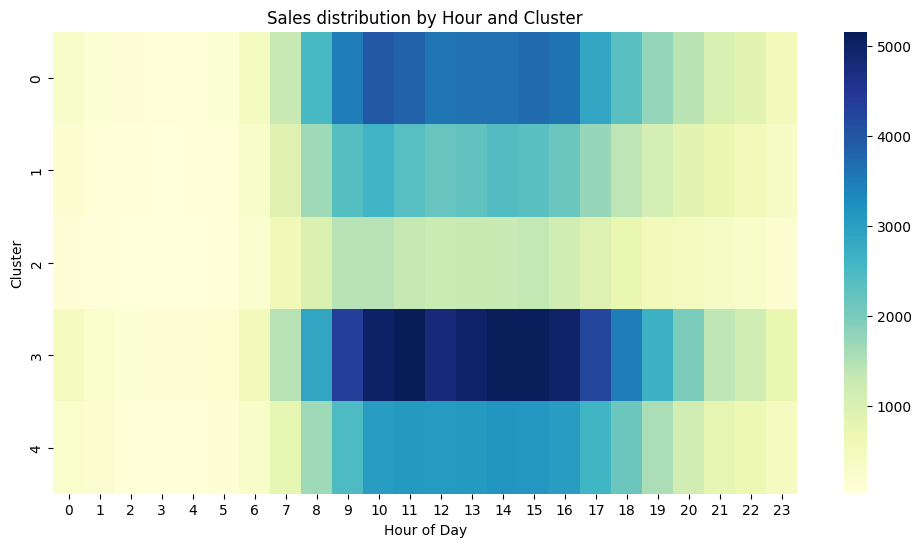

In [31]:
order_hour_counts = df_l3.groupby(['Clusters_3', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(order_hour_counts, cmap='YlGnBu', annot=False)
plt.title('Sales distribution by Hour and Cluster')
plt.xlabel('Hour of Day')
plt.ylabel('Cluster')
plt.show()

### Clustering - K-Means - n=5 with Input Reduction

In [32]:
X2 = df[['max_order', 'order_hour_of_day', 'days_since_prior_order', 'reordered']]

In [33]:
X_train = X2.values

kmeans4 = KMeans(n_clusters=5, random_state=100)
kmeans4.fit(X_train)

predictions = kmeans4.predict(X_train)

counts = np.bincount(predictions, minlength=5).reshape(1, 5)

countscldf = pd.DataFrame(counts, columns=["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])

countscldf

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
0      45284      61099      15930      28621      36812

Explained variance ratio (first two components): [0.87658475 0.0963831 ]


<Figure size 640x480 with 0 Axes>

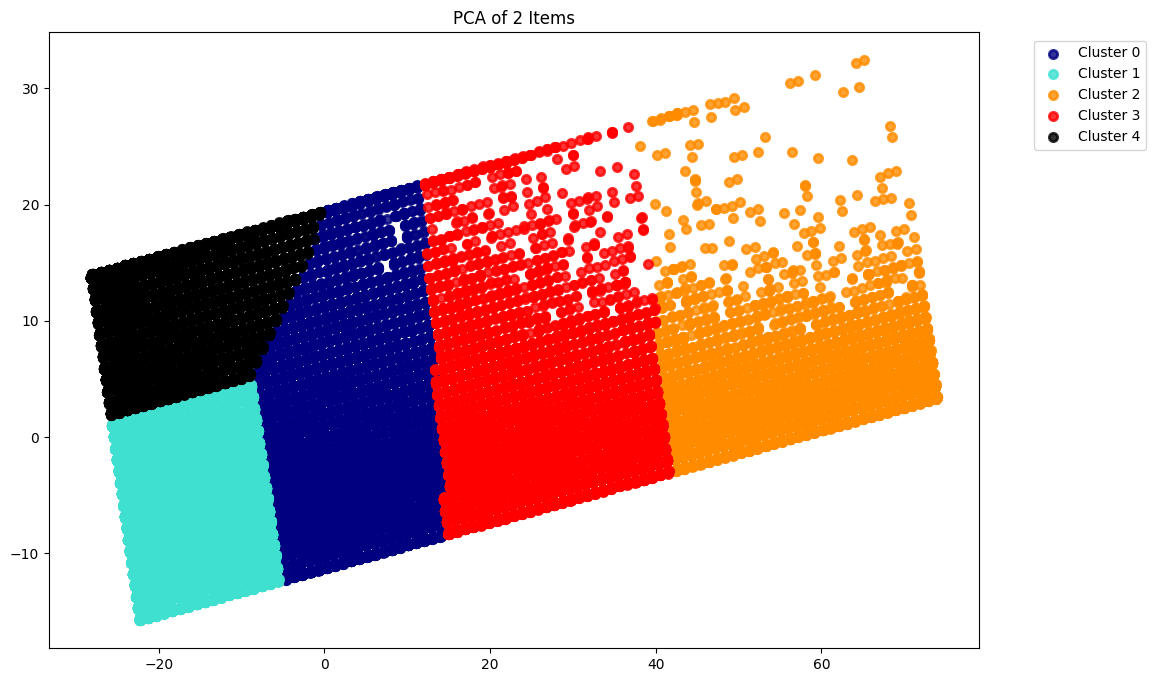

In [ ]:
X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)

print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [35]:
df['Clusters_4'] = kmeans4.labels_

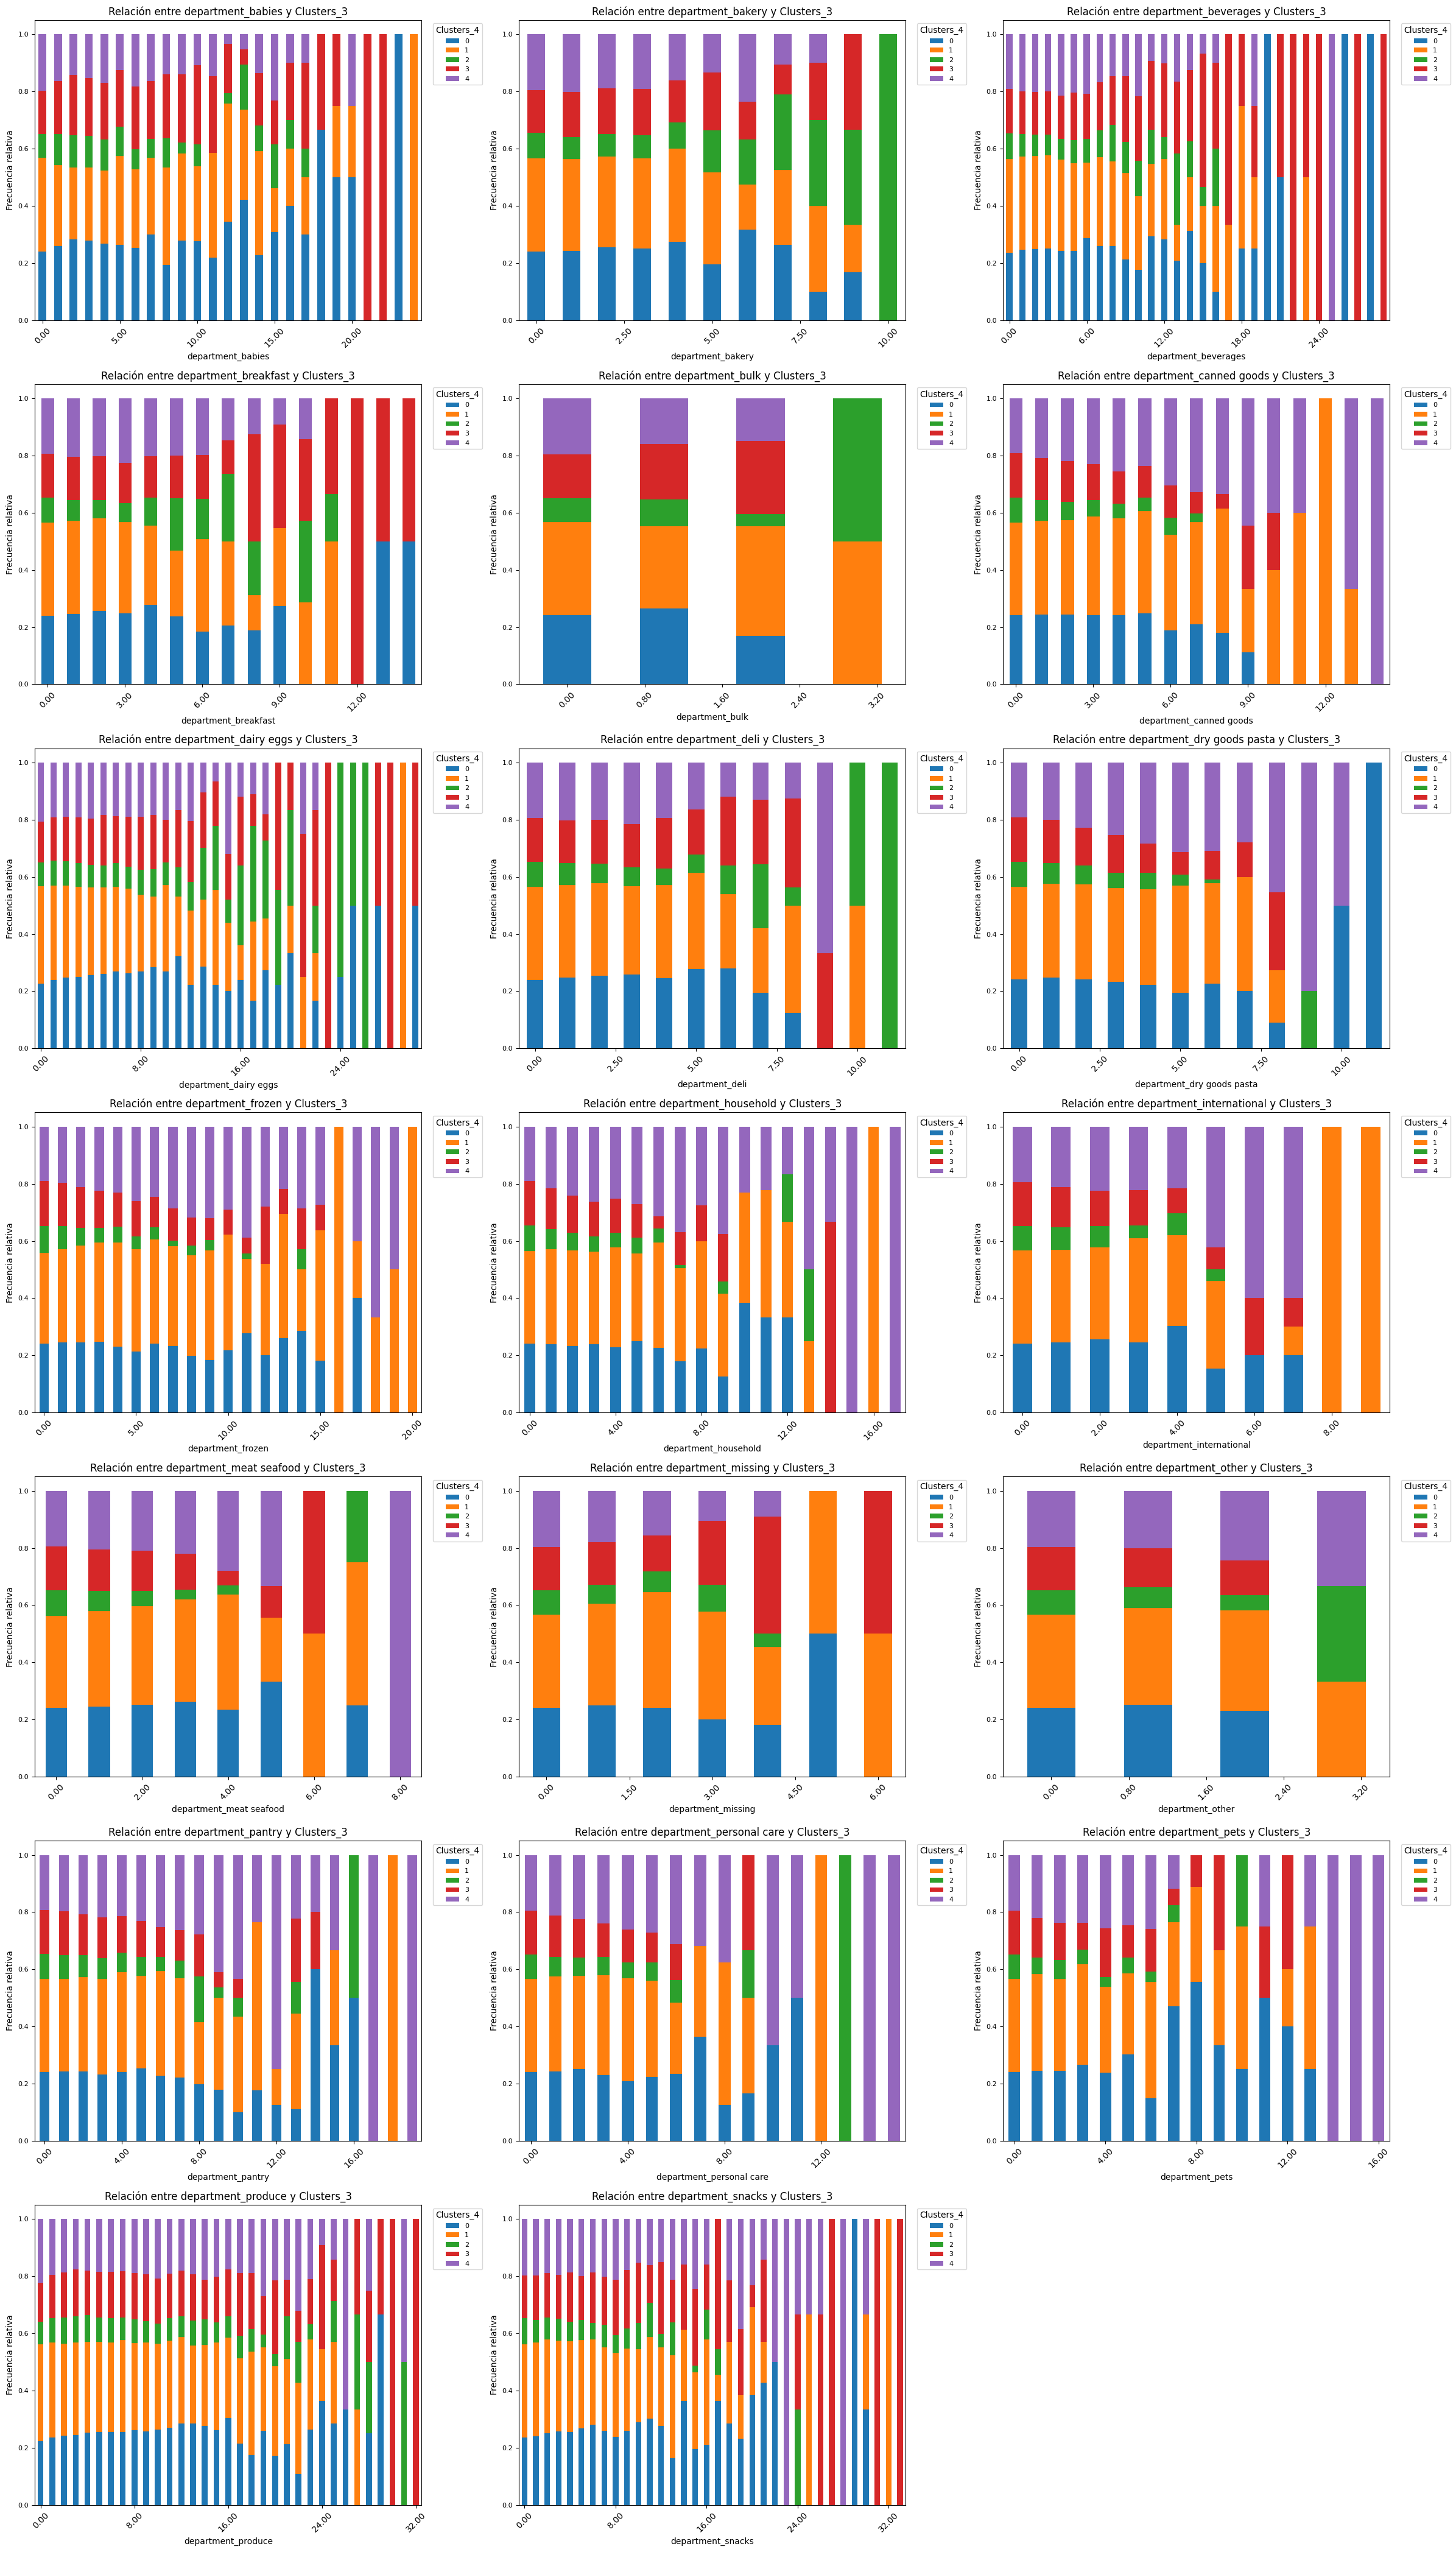

In [36]:
department_columns = [col for col in df.columns if col.startswith('department')]

num_rows = 7
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8 * num_cols, 6 * num_rows))

for i, columna in enumerate(department_columns):
    if i >= num_rows * num_cols:
        break
    
    row = i // num_cols
    col = i % num_cols

    frecuencias = df.groupby(columna)['Clusters_4'].value_counts(normalize=True).unstack()
    frecuencias.plot(kind='bar', stacked=True, ax=axs[row, col])
    
    axs[row, col].set_title(f'Relación entre {columna} y Clusters_3', fontsize=12)
    axs[row, col].set_xlabel(columna, fontsize=10)
    axs[row, col].set_ylabel('Frecuencia relativa', fontsize=10)
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=10)
    axs[row, col].tick_params(axis='y', labelsize=8)

    axs[row, col].legend(title='Clusters_4', fontsize=8, bbox_to_anchor=(1.02, 1), loc='upper left')
    
    axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(5))
    axs[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

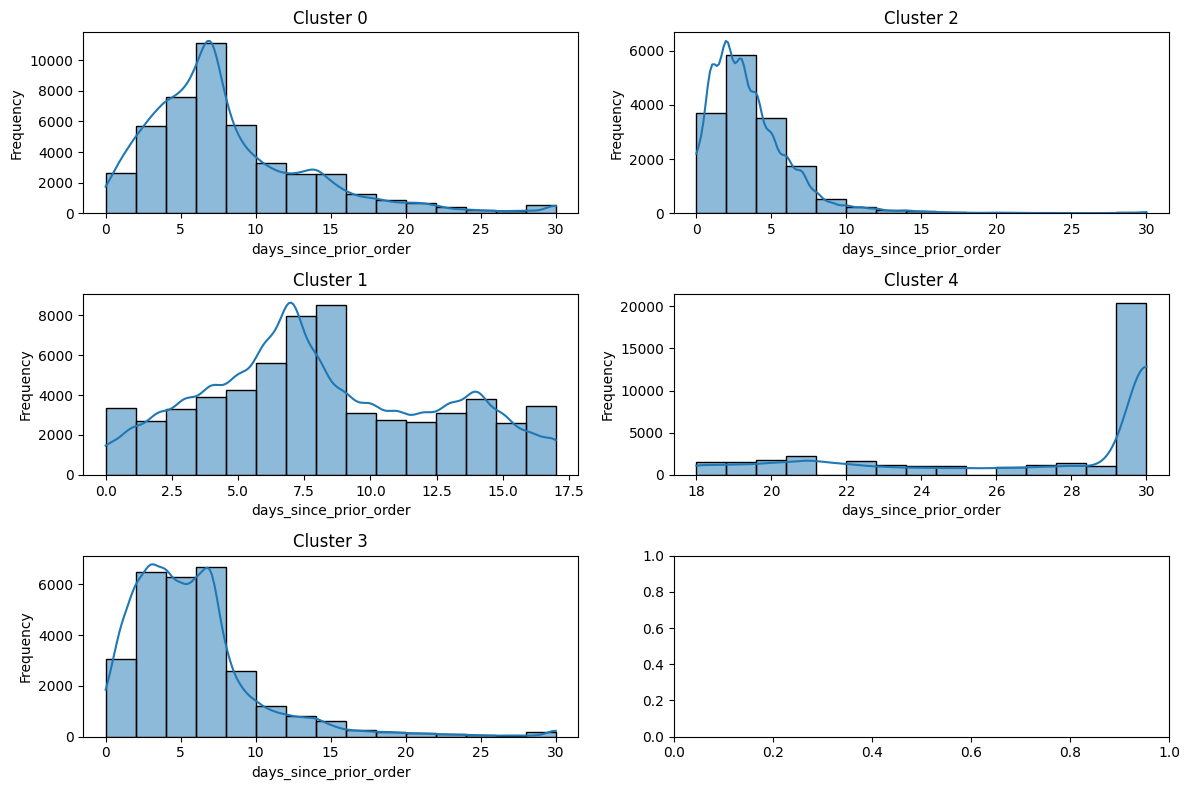

In [37]:
clusters = df['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[df['Clusters_4'] == cluster]['days_since_prior_order'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('days_since_prior_order')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

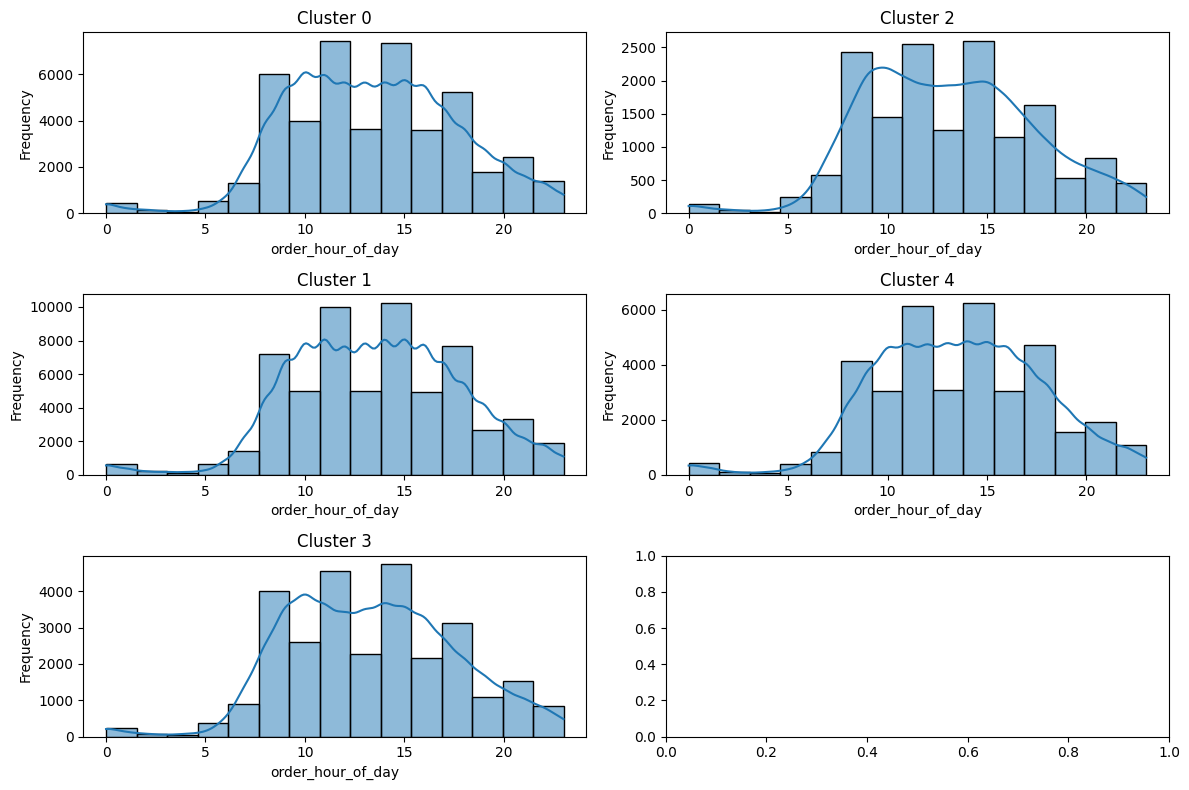

In [38]:
clusters = df['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[df['Clusters_4'] == cluster]['order_hour_of_day'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('order_hour_of_day')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

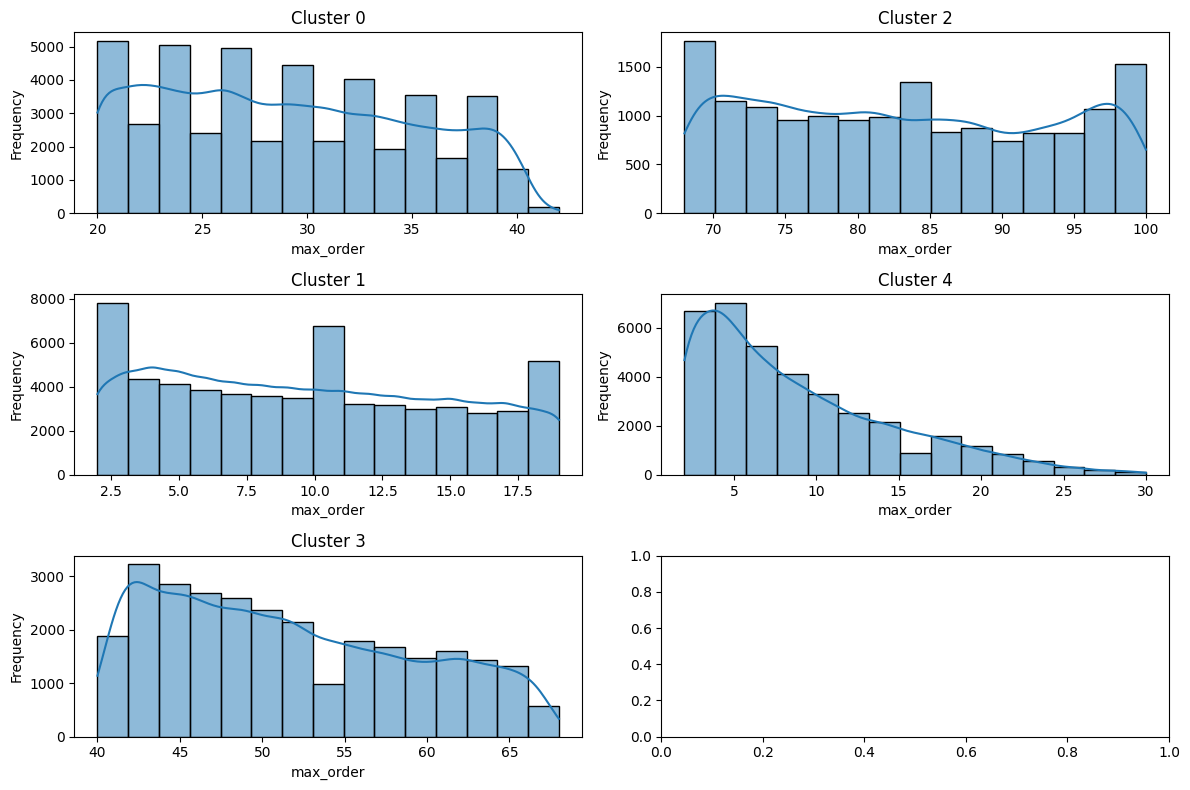

In [39]:
clusters = df['Clusters_4'].unique()
n_clusters = len(clusters)

n_cols = 2
n_rows = math.ceil(n_clusters / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, cluster in enumerate(clusters):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(df[df['Clusters_4'] == cluster]['max_order'], kde=True, bins=15, ax=axes[row, col])
    axes[row, col].set_title(f'Cluster {cluster}')
    axes[row, col].set_xlabel('max_order')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()